# AD PRICING STRATEGY GOOGLE PLAY STORE

### Importing libraries

In [2]:
import pandas as pd
import random
from bs4 import BeautifulSoup
import requests, lxml, re, json
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra
import matplotlib.pyplot as plt
import seaborn as sns  # visualization tool
from datetime import datetime
# plotly
import plotly 
import numpy as np
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import scipy.stats as stats

### Google Play Store Scraper

In [2]:
!pip install google-play-scraper

In [2]:
from google_play_scraper import app

### Creating url's for different category of games on PlayStore in US and UK

In [135]:
links=[]
category = ['GAME_PUZZLE','GAME_ACTION','GAME_ARCADE','GAME_RACING','GAME_SPORTS','GAME_CASUAL','GAME_SIMULATION','GAME_MUSIC','GAME_CARD','GAME_ROLE_PLAYING','GAME_WORD','GAME_STRATEGY','GAME_ADVENTURE','GAME_EDUCATIONAL','GAME_BOARD']
for i in range(0, len(category)):
    data='https://play.google.com/store/apps/category/'+category[i]+'?hl=en_US&gl=US'

    links.append(data)


### Agents

In [136]:
#HEADERS
headers_list = [
    # Firefox 106 Win10
    {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:106.0) Gecko/20100101 Firefox/106.0",
    "Accept": "text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8",
    "Accept-Language": "en-US,en;q=0.5",
    "Referer": "https://www.google.com/",
    "DNT": "1",
    "Connection": "keep-alive",
    "Upgrade-Insecure-Requests": "1"
    },
    # Chrome 107.0 Win10
    {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/107.0.0.0 Safari/537.36",
    "Accept": "text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8",
    "Accept-Language": "en-US,en;q=0.5",
    "Accept-Encoding": "gzip, deflate, br",
    "Referer": "https://www.google.com/",
    "DNT": "1",
    "Connection": "keep-alive",
    "Upgrade-Insecure-Requests": "1"
    },
    # Chrome 107.0 MacOS X
    {
    "Connection": "keep-alive",
    "DNT": "1",
    "Upgrade-Insecure-Requests": "1",
    "User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 13_0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/107.0.0.0 Safari/537.36",
    "Accept": "text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9",
    "Sec-Fetch-Site": "none",
    "Sec-Fetch-Mode": "navigauthorate",
    "Sec-Fetch-Dest": "document",
    "Referer": "https://www.google.com/",
    "Accept-Encoding": "gzip, deflate, br",
    "Accept-Language": "en-GB,en-US;q=0.9,en;q=0.8"
    },
    # Firefox 106 MacOS X
    {
    "Connection": "keep-alive",
    "Upgrade-Insecure-Requests": "1",
    "User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 13.0; rv:106.0) Gecko/20100101 Firefox/106.0",
    "Accept": "text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9",
    "Sec-Fetch-Site": "same-origin",
    "Sec-Fetch-Mode": "navigate",
    "Sec-Fetch-User": "?1",
    "Sec-Fetch-Dest": "document",
    "Referer": "https://www.google.com/",
    "Accept-Encoding": "gzip, deflate, br",
    "Accept-Language": "en-US,en;q=0.9"
    }
]

### Creating list using BeautifulSoup

In [137]:
country =[]
weblink = []
cat = []

dt = pd.DataFrame(columns=['weblink','country','category'],index=[''])
id_list=[]

for link in range(0,len(links)):
    headers = random.choice(headers_list)
    r = requests.Session()
    r.headers = headers
    html = r.get(links[link]).text
    
    soup = BeautifulSoup(html,'html.parser')
    
    for a in soup.find_all('a', href=True):
        if('?id=' in a['href']):
            weblink.append(a['href'][a['href'].index('?id=')+4:])
            country.append(links[link][-2:])
            cat.append(links[link][links[link].index('category/')+9:links[link].index('?')])
    

### DataFrame

In [138]:
d = {'category':cat, 'link':weblink, 'country':country}

df_data = pd.DataFrame(d, columns = ['category', 'link', 'country'])
df_data.head()

category                            link country
0  GAME_PUZZLE                com.dxm.nopuzzle      US
1  GAME_PUZZLE       sonic.bubbleshoot.classic      US
2  GAME_PUZZLE            com.zeptolab.ctr.ads      US
3  GAME_PUZZLE  com.puzzle.fun.free.matching3d      US
4  GAME_PUZZLE   puzzle.blockpuzzle.cube.relax      US

In [139]:
df_data.shape

(1657, 3)

In [140]:
df_data.groupby('country').count()

category  link
country                
US           1657  1657

In [141]:
df_data.groupby('category').count()

link  country
category                        
GAME_ACTION         135      135
GAME_ADVENTURE      115      115
GAME_ARCADE         112      112
GAME_BOARD           87       87
GAME_CARD           106      106
GAME_CASUAL         101      101
GAME_EDUCATIONAL    120      120
GAME_MUSIC           68       68
GAME_PUZZLE         117      117
GAME_RACING         109      109
GAME_ROLE_PLAYING   135      135
GAME_SIMULATION     138      138
GAME_SPORTS         110      110
GAME_STRATEGY       140      140
GAME_WORD            64       64

### Importing libraries

In [142]:
import json
import pandas as pd
from tqdm import tqdm

import seaborn as sns
import matplotlib.pyplot as plt

from pygments import highlight
from pygments.lexers import JsonLexer
from pygments.formatters import TerminalFormatter

from google_play_scraper import Sort, reviews, app

%matplotlib inline
%config InlineBackend.figure_format='retina'

sns.set(style='dark', palette='rocket')

### Scraping app info

In [143]:
def func_apply(row):
    apt = row['link']
    print(apt)
    country = row['country']
    info = app(apt, lang='en', country=row['country'])
    del info['comments']
    return info

lst = df_data.apply(lambda row: func_apply(row), axis=1)

com.dxm.nopuzzle
sonic.bubbleshoot.classic
com.zeptolab.ctr.ads
com.puzzle.fun.free.matching3d
puzzle.blockpuzzle.cube.relax
com.puzzle1studio.go.bubblepoporiginpuzzlegame
linkdesks.bubblegames.bubbleshooter.royal.pop
com.infinitygames.loopenergy
com.bitmango.go.mahjongsolitaireclassic
easy.sudoku.puzzle.solver.free
com.bandagames.mpuzzle.gp
com.tripledot.woodoku
jigsaw.puzzle.free.games
com.king.candycrushjellysaga
com.easybrain.number.puzzle.game
com.integragames.openhouse.android
com.rovio.abcasual
com.easybrain.jigsaw.puzzles
com.gamegos.mobile.manorcafe
com.dreamgames.royalmatch
com.SuperAwesome.HelloKittyFriends
com.g5e.sherlock.android
com.bigcool.puzzle.designblast
com.cookapps.sunnyhouse
com.gamehouse.deliciousmatch3
com.bigfishgames.mergetalesgoog
com.mergeland.alices.wonder.adventure
com.criticalhitsoftware.jigsawpuzzle
com.beresnevgames.pixelgallery
com.bitmango.go.lollipop2match3
air.com.sgn.cookiejam.gp
com.JindoBlu.Antistress
easy.sudoku.puzzle.solver.free
com.king.candy

com.my.cooking.chef.kitchen.craze.fever
com.nordcurrent.canteenhd
com.alien.shooter.galaxy.attack
com.rovio.angrybirdstransformers
com.robtopx.geometrydashmeltdown
com.fungames.blockcraft
com.JindoBlu.TwoPlayerGamesChallenge
com.sega.sonicdash
com.gameloft.android.ANMP.GloftA3HM
com.FDGEntertainment.redball4.gp
com.nekki.vector
com.imangi.templerun
com.skyraptor.spaceshooter
com.robtopx.geometrydashsubzero
com.my.cooking.chef.kitchen.craze.fever
com.nordcurrent.canteenhd
com.alien.shooter.galaxy.attack
com.rovio.angrybirdstransformers
com.robtopx.geometrydashmeltdown
com.biglime.cookingmadness
com.alienshooter.galaxy.attack2
com.rocket.dragon
com.techvision.restaurant
com.fme.cooking.crush.food.games
com.mobirix.swipebrick
com.nordcurrent.canteenhd
com.generagames.ramboat2.bestarcadeshooter
pl.idreams.SkyForceReloaded2016
com.halfbrick.dantheman
com.ankama.dragnboom
com.nekki.vector
com.imangi.templerun
com.rovio.angrybirdsfriends
com.skyraptor.spaceshooter
com.my.cooking.chef.kitchen.

com.phonemaster.jewelhunter
com.bigcool.puzzle.fruitgenies
com.kooapps.stackybirdandroid
com.ea.game.pvz2_na
com.playrix.homescapes
com.bubadu.bubbu
com.gameloft.android.ANMP.GloftDMHM
com.rovio.baba
com.moonactive.coinmaster
com.playrix.gardenscapes
com.playrix.township
com.rovio.baba
com.gameloft.android.ANMP.GloftDMHM
com.tapblaze.pizzabusiness
com.gamehouse.arcane2
com.crowdstar.covetfashion
com.go7game.jewelclassic
com.king.farmheroessaga
com.king.candycrushsodasaga
com.cooyostudio.marble.blast
com.cooyostudio.marble.blast2
com.outfit7.mytalkingangelafree
com.foranj.farmtown
com.holycowstudio.myhomemakeoverdesigndreamsdecorate
linkdesks.pop.bubblegames.bubbleshooter
air.au.com.metro.DumbWaysToDie2
com.gameloft.android.ANMP.GloftDMHM
com.king.candycrush4
com.outfit7.mytalkingtomfriends
com.rovio.ABstellapop
com.tiltingpoint.spongebob
com.outfit7.mytalkingtomfree
com.phonemaster.jewelhunter
com.noxgames.merge.truck
es.parrotgames.restaurantcity
com.rovio.baba
linkdesks.pop.bubblegam

solitaire.patience.card.games.klondike.free
com.smilerlee.klondike
at.ner.SolitaireKlondike
beetles.puzzle.solitaire
com.yallaplay.spadesmasters
com.microsoft.microsoftsolitairecollection
com.brainium.spiderfree
com.mobilityware.solitaire
com.mobilityware.PyramidFree
net.supertreat.solitaire
com.mobilityware.Hearts
com.solitaire.klondike.patience.ocean.aquarium
com.mobilityware.MonopolySolitaire
solitaire.card.classic.bgames
com.mobilityware.CastleSolitaire
jp.konami.duellinks
com.mattel163.phase10
com.ea.gp.pvzheroes
com.games.card.ginrummy
com.solitaire.fun.free.klondike.cardgames.farm.friends
com.microsoft.microsoftsolitairecollection
com.mobilityware.solitaire
com.brainium.spiderfree
solitaire.card.classic.bgames
com.matteljv.uno
com.mobilityware.MonopolySolitaire
com.yallaplay.spadesmasters
net.supertreat.solitaire
com.topps.marvel
com.ea.gp.pvzheroes
com.tinytouchtales.cardthief
com.mobilityware.CastleSolitaire
jp.konami.crossduel
com.pokemon.pokemontcgl
com.mattel163.phase10
com

com.kristanix.android.wordsearch
com.zenjoy.fish.word
com.wordfarm.scapes
com.holycowstudio.my.home.design.makeover.luxury.interiors.word.dream.million.dollar.house.renovation
com.fanatee.noodles
com.sonypicturestelevision.WheelPuzzlePop
com.apprope.wordmansion
com.zenjoy.fish.word
com.qiiwi.midsomermurders
com.wordfarm.scapes
com.holycowstudio.my.home.design.makeover.luxury.interiors.word.dream.million.dollar.house.renovation
com.gamehouse.tx
com.fanatee.noodles
com.qiiwi.wordington
com.apprope.wordmansion
com.kristanix.android.wordsearch
com.gamehouse.tx
com.fanatee.noodles
com.qiiwi.wordington
com.apprope.wordmansion
com.ea.game.pvzfree_row
com.supercell.clashofclans
com.supercell.clashroyale
air.com.mildright.AncientEmpire
net.argongames.minitd2
com.eldring.exominer
com.strategy.war.ww2.glory.tactics
com.nhn.gunsup
com.lilithgame.roc.gp
com.lpg.aom
com.zynga.empires2
br.com.tapps.vloggergoviral
com.innogames.riseofcultures
com.zeptolab.thieves.google
com.outplayentertainment.alienc

com.rvappstudios.math.kids.counting
jp.colopl.nyankous
com.minimuffin.birthdaystories
com.iz.baby.games.kids.toddler.learning.shark.puzzle.game
com.rvappstudios.baby.games.piano.phone.kids
com.sinyee.babybus.shopping
com.rvappstudios.shapes.colors.toddler
tv.alphablocks.alphablocksworld
at.ecml.edl.challenges
com.rvappstudios.kids.multiplication.games.multiply.math
org.pbskids.playandlearnscience
com.minimango.games.letters.numbers
com.amayasoft.cars.kids.toddlers.garage.game
com.rvappstudios.kids.drawing.games.coloring.book.paint
com.minimuffin.gardenstories
com.rvappstudios.math.kids.counting
com.iz.baby.games.kids.toddler.learning.shark.puzzle.game
com.rvappstudios.baby.games.piano.phone.kids
com.sinyee.babybus.shopping
com.rvappstudios.shapes.colors.toddler
com.rvappstudios.kids.multiplication.games.multiply.math
org.pbskids.playandlearnscience
com.minimango.games.letters.numbers
com.amayasoft.cars.kids.toddlers.garage.game
com.storytoys.lego.duplo.world.kids.play.free.friends.anim

In [144]:
len(lst)

1657

In [145]:
def print_json(json_object):
    json_str = json.dumps(
        json_object, 
        indent=2, 
        sort_keys=True, 
        default=str
    )
    print(highlight(json_str, JsonLexer(), TerminalFormatter()))

In [206]:
print_json(lst[1])

{
  "adSupported": true,
  "appId": "sonic.bubbleshoot.classic",
  "containsAds": true,
  "contentRating": "Everyone",
  "contentRatingDescription": null,
  "currency": "USD",
  "description": "Play the highly addictive bubble pop game for fun. Bubble Shooter Magic is a relaxing bubble shooter game. You can even enjoy it offline.\r\n\r\nAim, match and smash all the balls in this relaxing color-matching adventure. This is an endless shooter games that are simple and easy to learn, perfect for families to enjoy.\r\n\r\nHow to play\r\n\u2713 Match 3 or more bubbles to make them burst\r\n\u2713 Clear all the bubbles on the screen to level up\r\nTips: Try to get 3 stars on each level. Breaking the bubbles continuously can get points as a bonus.\r\n\r\nFun features\r\n- 4 colorful bubbles to pop\r\n- More than 2000 challenging levels, 500 different levels added weekly\r\n- Collect awesome daily rewards\r\n- Pop 7 bubbles in a row to unlock the Rocket\r\n- No energy, no pressure and No Wifi N

In [147]:
# App Data into Pandas DF to store it
app_infos_df = pd.DataFrame(list(lst))
app_infos_df.to_csv('c://loads/Project_apps.csv', index=None, header=True)

In [65]:
app_data=pd.read_csv('C:/loads/Project_apps.csv')
app_data

title  \
0                       Block Puzzle   
1     Bubble Pop Dream: Bubble Shoot   
2                       Cut the Rope   
3     Match 3D Master Matching Games   
4     Wood Block Puzzle - Brain Game   
...                              ...   
1652  Game of Dice: Board&Card&Anime   
1653              Mahjong In Poculis   
1654                      Rummy Club   
1655  Dice With Buddies™ Social Game   
1656   Domino Go - Online Board Game   

                                            description  \
0     Drop the blocks to create vertically or horizo...   
1     Play the highly addictive bubble pop game for ...   
2     Follow the adventure of Om Nom in the first pa...   
3     Match 3D Master is a challenging and original ...   
4     <i>Wood Block Puzzle - Classic Block Puzzle Ga...   
...                                                 ...   
1652  <font color="#ff8c8c"><b>What is ‘Game of Dice...   
1653  Mahjong In Poculis is a Mahjong Solitaire game...   
1654  Rummy has the right combination of luck, skill...   
1655  *Dice With Buddies™*\r\n\r\nDice With Buddies ...   
1656  Let’s go play Domino Go! This classic, beloved...   

                                        descriptionHTML  \
0     Drop the blocks to create vertically or horizo...   
1     Play the highly addictive bubble pop game for ...   
2     Follow the adventure of Om Nom in the first pa...   
3     Match 3D Master is a challenging and original ...   
4     <i>Wood Block Puzzle - Classic Block Puzzle Ga...   
...                                                 ...   
1652  <font color="#ff8c8c"><b>What is ‘Game of Dice...   
1653  Mahjong In Poculis is a Mahjong Solitaire game...   
1654  Rummy has the right combination of luck, skill...   
1655  *Dice With Buddies™*<br><br>Dice With Buddies ...   
1656  Let’s go play Domino Go! This classic, beloved...   

                                                summary      installs  \
0                The sweetest and simplest puzzle game!   10,000,000+   
1     Enjoy Bubble Shooter. So relaxing and fun. Sho...    1,000,000+   
2     Cut the Rope, catch a star, and feed Om Nom ca...  100,000,000+   
3     Play Pair Matching puzzle to train your brain....    1,000,000+   
4     Popular in 2021 Train your brain with the wood...   50,000,000+   
...                                                 ...           ...   
1652  Use SKILLS and DICE in this real-time multi-pl...    5,000,000+   
1653  300 original layouts, 6 fun themes and worldwi...       50,000+   
1654                    World-famous logic puzzle game.    1,000,000+   
1655  Dice games for everyone! Get social and play m...   10,000,000+   
1656  Play fun classic dominos board games with frie...    1,000,000+   

      minInstalls  realInstalls     score    ratings  reviews  ...  \
0        10000000      20425608  4.599118   137978.0  31940.0  ...   
1         1000000       4302840  4.842682    21251.0   4607.0  ...   
2       100000000     230505507  4.524385  2684724.0  95365.0  ...   
3         1000000       2138559  4.810047    31130.0   4109.0  ...   
4        50000000      85769841  4.540791   949972.0  42211.0  ...   
...           ...           ...       ...        ...      ...  ...   
1652      5000000       7906034  4.252134   303982.0  12387.0  ...   
1653        50000         89118  4.390000      970.0     58.0  ...   
1654      1000000       2260624  4.645740    36563.0    681.0  ...   
1655     10000000      10703209  4.166714   192795.0  46903.0  ...   
1656      1000000       1000248  4.000000     5579.0    279.0  ...   

     contentRatingDescription  adSupported  containsAds      released  \
0                         NaN         True         True  Mar 12, 2019   
1                         NaN         True         True  Apr 28, 2021   
2                         NaN         True         True  Mar 27, 2012   
3                         NaN        False        False  Jan 14, 2021   
4                         NaN         True       

### Basic cleaning

In [66]:
del app_data['sale']
del app_data['saleTime']
del app_data['originalPrice']
del app_data['saleText']
del app_data['developerId']
del app_data['developerEmail']
del app_data['developerWebsite']
del app_data['developerAddress']
del app_data['privacyPolicy']
del app_data['genreId']
del app_data['icon']
del app_data['headerImage']
del app_data['installs']
del app_data['histogram']
del app_data['screenshots']
del app_data['video']
del app_data['videoImage']
del app_data['containsAds']
del app_data['currency']
del app_data['updated']

### All app data info

In [303]:
app_data.info()

### Checking null, not-null and unique

In [295]:
def info():
  tp=pd.DataFrame(index=app_data.columns)
  tp["type"]=app_data.dtypes
  tp["not-null"]=app_data.count()
  tp["null"]=app_data.isnull().sum()
  tp["count unique"]=app_data.nunique()
  return tp
info()

type  not-null  null  count unique
title                      object      1651     0           893
description                object      1651     0           896
descriptionHTML            object      1651     0           896
summary                    object      1651     0           890
minInstalls                 int64      1651     0            11
realInstalls                int64      1651     0           896
score                     float64      1651     0           892
ratings                   float64      1651     0           959
reviews                   float64      1651     0           885
price                     float64      1651     0            15
free                         bool      1651     0             2
offersIAP                    bool      1651     0             2
inAppProductPrice          object      1499   152           182
developer                  object      1651     0           563
genre                      object      1651     0            15
contentRating              object      1651     0             4
contentRatingDescription   object       739   912           119
adSupported                  bool      1651     0             2
released                   object      1651     0           744
version                    object      1651     0           694
recentChanges              object      1580    71           811
recentChangesHTML          object      1580    71           811
appId                      object      1651     0           896
url                        object      1651     0           896

In [73]:
app_data.head()

title  \
0                    Block Puzzle   
1  Bubble Pop Dream: Bubble Shoot   
2                    Cut the Rope   
3  Match 3D Master Matching Games   
4  Wood Block Puzzle - Brain Game   

                                         description  \
0  Drop the blocks to create vertically or horizo...   
1  Play the highly addictive bubble pop game for ...   
2  Follow the adventure of Om Nom in the first pa...   
3  Match 3D Master is a challenging and original ...   
4  <i>Wood Block Puzzle - Classic Block Puzzle Ga...   

                                     descriptionHTML  \
0  Drop the blocks to create vertically or horizo...   
1  Play the highly addictive bubble pop game for ...   
2  Follow the adventure of Om Nom in the first pa...   
3  Match 3D Master is a challenging and original ...   
4  <i>Wood Block Puzzle - Classic Block Puzzle Ga...   

                                             summary  minInstalls  \
0             The sweetest and simplest puzzle game!     10000000   
1  Enjoy Bubble Shooter. So relaxing and fun. Sho...      1000000   
2  Cut the Rope, catch a star, and feed Om Nom ca...    100000000   
3  Play Pair Matching puzzle to train your brain....      1000000   
4  Popular in 2021 Train your brain with the wood...     50000000   

   realInstalls     score    ratings  reviews  price  ...   genre  \
0      20425608  4.599118   137978.0  31940.0    0.0  ...  Puzzle   
1       4302840  4.842682    21251.0   4607.0    0.0  ...  Puzzle   
2     230505507  4.524385  2684724.0  95365.0    0.0  ...  Puzzle   
3       2138559  4.810047    31130.0   4109.0    0.0  ...  Puzzle   
4      85769841  4.540791   949972.0  42211.0    0.0  ...  Puzzle   

   contentRating contentRatingDescription adSupported      released version  \
0       Everyone                      NaN        True  Mar 12, 2019   1.4.0   
1       Everyone                      NaN        True  Apr 28, 2021  1.1.64   
2       Everyone                      NaN        True  Mar 27, 2012  3.39.0   
3       Everyone                      NaN       False  Jan 14, 2021  1.22.2   
4       Everyone                      NaN        True  Jun 19, 2019  2.8.12   

                                       recentChanges  \
0            Bug fixes and performance improvements.   
1       Game experience and Performance optimization   
2  Weighed the Om Nom while you are not playing, ...   
3                                                NaN   
4                                                NaN   

                                   recentChangesHTML  \
0            Bug fixes and performance improvements.   
1       Game experience and Performance optimization   
2  Weighed the Om Nom while you are not playing, ...   
3                                                NaN   
4                                                NaN   

                            appId  \
0                com.dxm.nopuzzle   
1       sonic.bubbleshoot.classic   
2            com.zeptolab.ctr.ads   
3  com.puzzle.fun.free.matching3d   
4   puzzle.blockpuzzle.cube.relax   

                                                 url  
0  https://play.google.com/store/apps/details?id=...  
1  https://play.google.com/store/apps/details?id=...  
2  https://play.google.com/store/apps/details?id=...  
3  https://play.google.com/store/apps/details?id=...  
4  https://play.google.com/store/apps/details?id=...  

[5 rows x 24 columns]

### Dropping null values less than 6

In [67]:
app_data=app_data[app_data["score"].notna()]
# Shape of the updated dataframe
app_data.shape

(1651, 24)

### Dropping Dublicates

In [68]:
data_PUZZLE = app_data[app_data['genre']=='Puzzle']
data_ACTION = app_data[app_data['genre']=='Action']
data_ARCADE = app_data[app_data['genre']=='Arcade']
data_RACING = app_data[app_data['genre']=='Racing']
data_SPORTS = app_data[app_data['genre']=='Sports']
data_CASUAL = app_data[app_data['genre']=='Casual']
data_SIMULATION = app_data[app_data['genre']=='Simulation']
data_MUSIC = app_data[app_data['genre']=='Music']
data_CARD = app_data[app_data['genre']=='Card']
data_ROLE_PLAYING = app_data[app_data['genre']=='Role Playing']
data_WORD = app_data[app_data['genre']=='Word']
data_STRATEGY = app_data[app_data['genre']=='Strategy']
data_ADVENTURE = app_data[app_data['genre']=='Adventure']
data_EDUCATIONAL = app_data[app_data['genre']=='Educational']
data_BOARD = app_data[app_data['genre']=='Board']

data_PUZZLE[data_PUZZLE.duplicated()]
data_PUZZLE.drop_duplicates(subset = 'title', inplace = True)
data_ACTION[data_ACTION.duplicated()]
data_ACTION.drop_duplicates(subset = 'title', inplace = True)
data_ARCADE[data_ARCADE.duplicated()]
data_ARCADE.drop_duplicates(subset = 'title', inplace = True)
data_RACING[data_RACING.duplicated()]
data_RACING.drop_duplicates(subset = 'title', inplace = True)
data_SPORTS[data_SPORTS.duplicated()]
data_SPORTS.drop_duplicates(subset = 'title', inplace = True)
data_CASUAL[data_CASUAL.duplicated()]
data_CASUAL.drop_duplicates(subset = 'title', inplace = True)
data_SIMULATION[data_SIMULATION.duplicated()]
data_SIMULATION.drop_duplicates(subset = 'title', inplace = True)
data_MUSIC[data_MUSIC.duplicated()]
data_MUSIC.drop_duplicates(subset = 'title', inplace = True)
data_CARD[data_CARD.duplicated()]
data_CARD.drop_duplicates(subset = 'title', inplace = True)
data_ROLE_PLAYING[data_ROLE_PLAYING.duplicated()]
data_ROLE_PLAYING.drop_duplicates(subset = 'title', inplace = True)
data_WORD[data_WORD.duplicated()]
data_WORD.drop_duplicates(subset = 'title', inplace = True)
data_STRATEGY[data_STRATEGY.duplicated()]
data_STRATEGY.drop_duplicates(subset = 'title', inplace = True)
data_ADVENTURE[data_ADVENTURE.duplicated()]
data_ADVENTURE.drop_duplicates(subset = 'title', inplace = True)
data_EDUCATIONAL[data_EDUCATIONAL.duplicated()]
data_EDUCATIONAL.drop_duplicates(subset = 'title', inplace = True)
data_BOARD[data_BOARD.duplicated()]
data_BOARD.drop_duplicates(subset = 'title', inplace = True)

C:\Users\hp\AppData\Local\Temp\ipykernel_20008\204317195.py:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\hp\AppData\Local\Temp\ipykernel_20008\204317195.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\hp\AppData\Local\Temp\ipykernel_20008\204317195.py:22: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\hp\AppData\Local\Temp\ipykernel_20008\204317195.py:24: SettingWithCopyWarning:


A value is trying t

In [69]:
df = data_PUZZLE.append([data_ACTION, data_ARCADE,data_RACING,data_SPORTS,data_CASUAL,data_SIMULATION,data_MUSIC,data_CARD,data_ROLE_PLAYING,data_WORD,data_STRATEGY,data_ADVENTURE,data_EDUCATIONAL,data_BOARD])

C:\Users\hp\AppData\Local\Temp\ipykernel_20008\1865331548.py:1: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [70]:
df

title  \
0                       Block Puzzle   
1     Bubble Pop Dream: Bubble Shoot   
2                       Cut the Rope   
3     Match 3D Master Matching Games   
4     Wood Block Puzzle - Brain Game   
...                              ...   
1630    Zoo Tile - Match Puzzle Game   
1631              Mahjong Tiny Tales   
1644                      Rummy Club   
1646  Dice With Buddies™ Social Game   
1653              Mahjong In Poculis   

                                            description  \
0     Drop the blocks to create vertically or horizo...   
1     Play the highly addictive bubble pop game for ...   
2     Follow the adventure of Om Nom in the first pa...   
3     Match 3D Master is a challenging and original ...   
4     <i>Wood Block Puzzle - Classic Block Puzzle Ga...   
...                                                 ...   
1630  <b>Solve 3 Tiles Puzzle</b> and <b>Build a Zoo...   
1631  "Once upon a time, there lived a noble king an...   
1644  Rummy has the right combination of luck, skill...   
1646  *Dice With Buddies™*\r\n\r\nDice With Buddies ...   
1653  Mahjong In Poculis is a Mahjong Solitaire game...   

                                        descriptionHTML  \
0     Drop the blocks to create vertically or horizo...   
1     Play the highly addictive bubble pop game for ...   
2     Follow the adventure of Om Nom in the first pa...   
3     Match 3D Master is a challenging and original ...   
4     <i>Wood Block Puzzle - Classic Block Puzzle Ga...   
...                                                 ...   
1630  <b>Solve 3 Tiles Puzzle</b> and <b>Build a Zoo...   
1631  &quot;Once upon a time, there lived a noble ki...   
1644  Rummy has the right combination of luck, skill...   
1646  *Dice With Buddies™*<br><br>Dice With Buddies ...   
1653  Mahjong In Poculis is a Mahjong Solitaire game...   

                                                summary  minInstalls  \
0                The sweetest and simplest puzzle game!     10000000   
1     Enjoy Bubble Shooter. So relaxing and fun. Sho...      1000000   
2     Cut the Rope, catch a star, and feed Om Nom ca...    100000000   
3     Play Pair Matching puzzle to train your brain....      1000000   
4     Popular in 2021 Train your brain with the wood...     50000000   
...                                                 ...          ...   
1630  Solve 3 tiles zen match puzzle to build a happ...      1000000   
1631  Exercise your mind with fun Mahjong puzzles in...       100000   
1644                    World-famous logic puzzle game.      1000000   
1646  Dice games for everyone! Get social and play m...     10000000   
1653  300 original layouts, 6 fun themes and worldwi...        50000   

      realInstalls     score    ratings  reviews  price  ...   genre  \
0         20425608  4.599118   137978.0  31940.0    0.0  ...  Puzzle   
1          4302840  4.842682    21251.0   4607.0    0.0  ...  Puzzle   
2        230505507  4.524385  2684724.0  95365.0    0.0  ...  Puzzle   
3          2138559  4.810047    31130.0   4109.0    0.0  ...  Puzzle   
4         85769841  4.540791   949972.0  42211.0    0.0  ...  Puzzle   
...            ...       ...        ...      ...    ...  ...     ...   
1630       1037783  4.326316    15450.0    937.0    0.0  ...   Board   
1631        285277  4.681275     9556.0   1033.0    0.0  ...   Board   
1644       2260624  4.645740    36563.0    681.0    0.0  ...   Board   
1646      10703209  4.166714   192795.0  46903.0    0.0  ...   Board   
1653         89118  4.390000      970.0     58.0    0.0  ...   Board   

      contentRating contentRatingDescription adSupported      released  \
0          Everyone                      NaN        True  Mar 12, 2019   
1          Everyone                      NaN        True  Apr 28, 2021   
2          Everyone                      NaN        True  Mar 27, 2012   
3          Everyone                      NaN       False  Jan 14, 2021   
4          Everyone             

In [71]:
df.reset_index()

index                           title  \
0        0                    Block Puzzle   
1        1  Bubble Pop Dream: Bubble Shoot   
2        2                    Cut the Rope   
3        3  Match 3D Master Matching Games   
4        4  Wood Block Puzzle - Brain Game   
..     ...                             ...   
888   1630    Zoo Tile - Match Puzzle Game   
889   1631              Mahjong Tiny Tales   
890   1644                      Rummy Club   
891   1646  Dice With Buddies™ Social Game   
892   1653              Mahjong In Poculis   

                                           description  \
0    Drop the blocks to create vertically or horizo...   
1    Play the highly addictive bubble pop game for ...   
2    Follow the adventure of Om Nom in the first pa...   
3    Match 3D Master is a challenging and original ...   
4    <i>Wood Block Puzzle - Classic Block Puzzle Ga...   
..                                                 ...   
888  <b>Solve 3 Tiles Puzzle</b> and <b>Build a Zoo...   
889  "Once upon a time, there lived a noble king an...   
890  Rummy has the right combination of luck, skill...   
891  *Dice With Buddies™*\r\n\r\nDice With Buddies ...   
892  Mahjong In Poculis is a Mahjong Solitaire game...   

                                       descriptionHTML  \
0    Drop the blocks to create vertically or horizo...   
1    Play the highly addictive bubble pop game for ...   
2    Follow the adventure of Om Nom in the first pa...   
3    Match 3D Master is a challenging and original ...   
4    <i>Wood Block Puzzle - Classic Block Puzzle Ga...   
..                                                 ...   
888  <b>Solve 3 Tiles Puzzle</b> and <b>Build a Zoo...   
889  &quot;Once upon a time, there lived a noble ki...   
890  Rummy has the right combination of luck, skill...   
891  *Dice With Buddies™*<br><br>Dice With Buddies ...   
892  Mahjong In Poculis is a Mahjong Solitaire game...   

                                               summary  minInstalls  \
0               The sweetest and simplest puzzle game!     10000000   
1    Enjoy Bubble Shooter. So relaxing and fun. Sho...      1000000   
2    Cut the Rope, catch a star, and feed Om Nom ca...    100000000   
3    Play Pair Matching puzzle to train your brain....      1000000   
4    Popular in 2021 Train your brain with the wood...     50000000   
..                                                 ...          ...   
888  Solve 3 tiles zen match puzzle to build a happ...      1000000   
889  Exercise your mind with fun Mahjong puzzles in...       100000   
890                    World-famous logic puzzle game.      1000000   
891  Dice games for everyone! Get social and play m...     10000000   
892  300 original layouts, 6 fun themes and worldwi...        50000   

     realInstalls     score    ratings  reviews  ...   genre  contentRating  \
0        20425608  4.599118   137978.0  31940.0  ...  Puzzle       Everyone   
1         4302840  4.842682    21251.0   4607.0  ...  Puzzle       Everyone   
2       230505507  4.524385  2684724.0  95365.0  ...  Puzzle       Everyone   
3         2138559  4.810047    31130.0   4109.0  ...  Puzzle       Everyone   
4        85769841  4.540791   949972.0  42211.0  ...  Puzzle       Everyone   
..            ...       ...        ...      ...  ...     ...            ...   
888       1037783  4.326316    15450.0    937.0  ...   Board       Everyone   
889        285277  4.681275     9556.0   1033.0  ...   Board       Everyone   
890       2260624  4.645740    36563.0    681.0  ...   Board           Teen   
891      10703209  4.166714   192795.0  46903.0  ...   Board   Everyone 10+   
892         89118  4.390000      970.0     58.0  ...   Board       Everyone   

     contentRatingDescription adSupported      released             version  \
0                         NaN        True  Mar 12, 2019               1.4.0   
1                         NaN        True  Apr 28, 2021              1.1.64   
2                  

In [132]:
# import datetime
from datetime import datetime
# d1=datetime.strptime(datetime.now(),"%Y-%m-%d")
# print(parser.parse(df['released'][0]))
df['released']=pd.to_datetime(df['released'])
# t=df['released'][0]
# k=abs(datetime.now()-t).days

df['number of days since release']=df['released'].apply(lambda x:(datetime.now()-x).days)
df['number of days since release']

# from dateutil import parser
# d2=datetime.strptime(parser.parse(df['released'][0]),"%Y-%m-%d")

0       1363
1        585
2       3904
3        689
4       1264
        ... 
1630     706
1631    1079
1644    1650
1646    3928
1653    3343
Name: number of days since release, Length: 893, dtype: int64

In [135]:
Downloads_per_day = df['realInstalls']/df['number of days since release']
df['Downloads_per_day'] = Downloads_per_day

In [161]:
print(stats.ttest_ind(data_free['Downloads_per_day'], data_not_free['Downloads_per_day'], equal_var = False))

Ttest_indResult(statistic=13.72679762239859, pvalue=8.800629342055037e-39)


In [136]:
df

title  \
0                       Block Puzzle   
1     Bubble Pop Dream: Bubble Shoot   
2                       Cut the Rope   
3     Match 3D Master Matching Games   
4     Wood Block Puzzle - Brain Game   
...                              ...   
1630    Zoo Tile - Match Puzzle Game   
1631              Mahjong Tiny Tales   
1644                      Rummy Club   
1646  Dice With Buddies™ Social Game   
1653              Mahjong In Poculis   

                                            description  \
0     Drop the blocks to create vertically or horizo...   
1     Play the highly addictive bubble pop game for ...   
2     Follow the adventure of Om Nom in the first pa...   
3     Match 3D Master is a challenging and original ...   
4     <i>Wood Block Puzzle - Classic Block Puzzle Ga...   
...                                                 ...   
1630  <b>Solve 3 Tiles Puzzle</b> and <b>Build a Zoo...   
1631  "Once upon a time, there lived a noble king an...   
1644  Rummy has the right combination of luck, skill...   
1646  *Dice With Buddies™*\r\n\r\nDice With Buddies ...   
1653  Mahjong In Poculis is a Mahjong Solitaire game...   

                                        descriptionHTML  \
0     Drop the blocks to create vertically or horizo...   
1     Play the highly addictive bubble pop game for ...   
2     Follow the adventure of Om Nom in the first pa...   
3     Match 3D Master is a challenging and original ...   
4     <i>Wood Block Puzzle - Classic Block Puzzle Ga...   
...                                                 ...   
1630  <b>Solve 3 Tiles Puzzle</b> and <b>Build a Zoo...   
1631  &quot;Once upon a time, there lived a noble ki...   
1644  Rummy has the right combination of luck, skill...   
1646  *Dice With Buddies™*<br><br>Dice With Buddies ...   
1653  Mahjong In Poculis is a Mahjong Solitaire game...   

                                                summary  minInstalls  \
0                The sweetest and simplest puzzle game!     10000000   
1     Enjoy Bubble Shooter. So relaxing and fun. Sho...      1000000   
2     Cut the Rope, catch a star, and feed Om Nom ca...    100000000   
3     Play Pair Matching puzzle to train your brain....      1000000   
4     Popular in 2021 Train your brain with the wood...     50000000   
...                                                 ...          ...   
1630  Solve 3 tiles zen match puzzle to build a happ...      1000000   
1631  Exercise your mind with fun Mahjong puzzles in...       100000   
1644                    World-famous logic puzzle game.      1000000   
1646  Dice games for everyone! Get social and play m...     10000000   
1653  300 original layouts, 6 fun themes and worldwi...        50000   

      realInstalls     score    ratings  reviews  price  ...   released  \
0         20425608  4.599118   137978.0  31940.0    0.0  ... 2019-03-12   
1          4302840  4.842682    21251.0   4607.0    0.0  ... 2021-04-28   
2        230505507  4.524385  2684724.0  95365.0    0.0  ... 2012-03-27   
3          2138559  4.810047    31130.0   4109.0    0.0  ... 2021-01-14   
4         85769841  4.540791   949972.0  42211.0    0.0  ... 2019-06-19   
...            ...       ...        ...      ...    ...  ...        ...   
1630       1037783  4.326316    15450.0    937.0    0.0  ... 2020-12-28   
1631        285277  4.681275     9556.0   1033.0    0.0  ... 2019-12-21   
1644       2260624  4.645740    36563.0    681.0    0.0  ... 2018-05-29   
1646      10703209  4.166714   192795.0  46903.0    0.0  ... 2012-03-03   
1653         89118  4.390000      970.0     58.0    0.0  ... 2013-10-09   

                 version                                      recentChanges  \
0                  1.4.0            Bug fixes and performance improvements.   
1                 1.1.64       Game experience and Performance optimization   
2                 3.39.0  Weighed the Om Nom while you are not playing, ...   
3                 1.22.2                          

### Distribution of rating

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='score'>

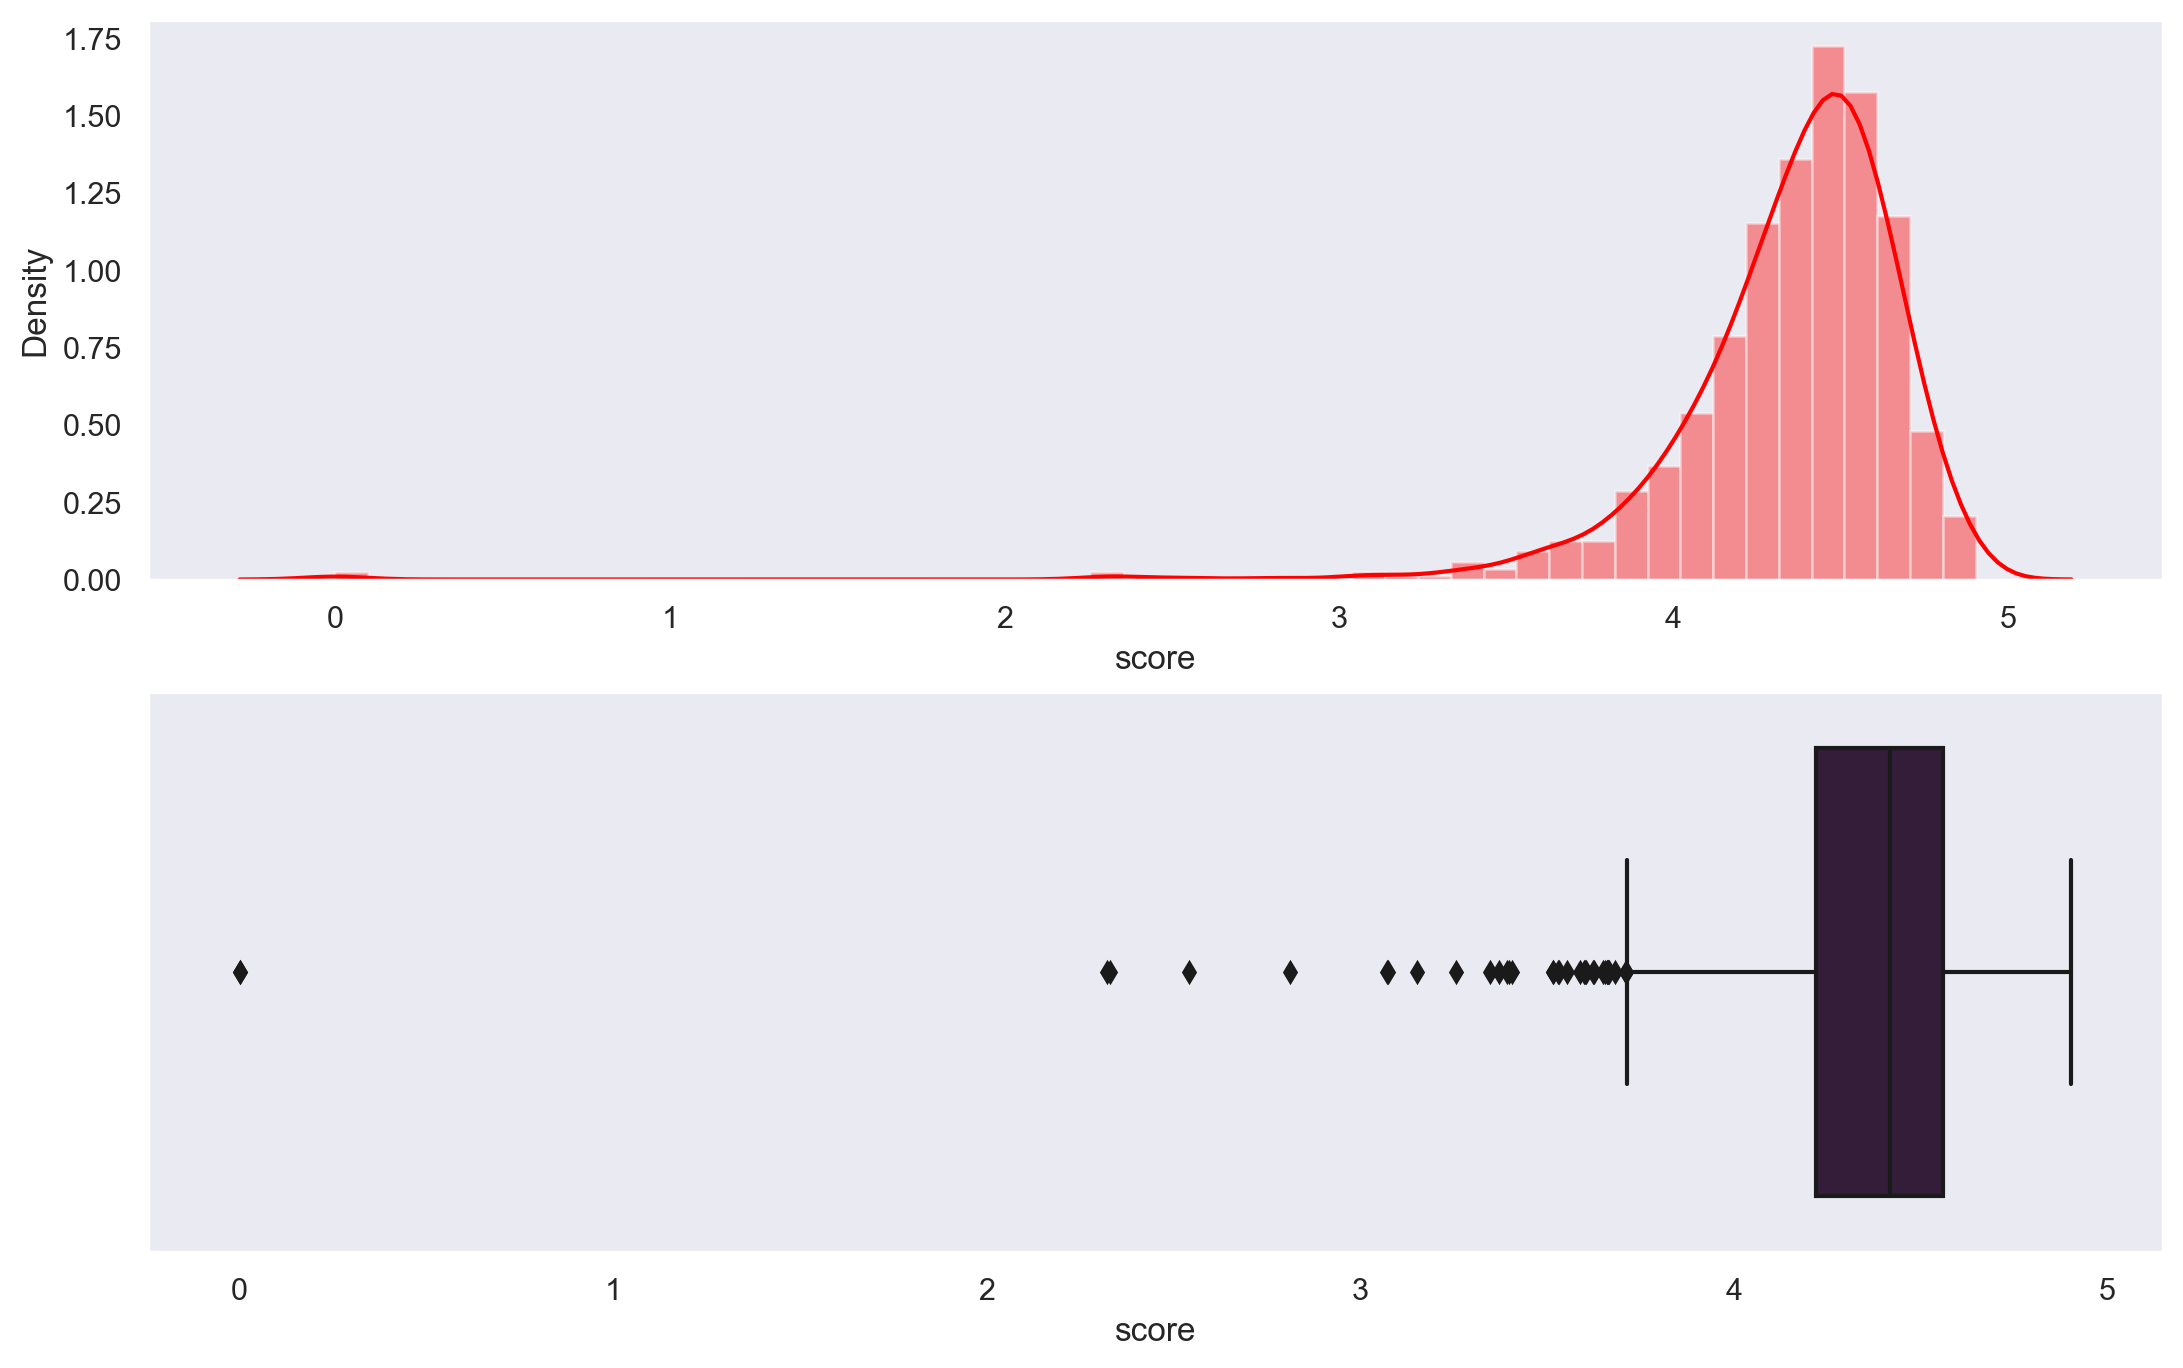

In [220]:
fig, ax = plt.subplots(2,1, figsize=(13,8))
sns.distplot(df['score'],color='Red',ax=ax[0])
sns.boxplot(x='score',data=df, ax=ax[1])

### Change the datatype of released date column from string to datetime.

In [223]:
# Pandas to_datetime() function applied.
df["released"] = pd.to_datetime(df['released'])

### Changing the datatype of Price column from string to float.

In [227]:
df["price"] = df['price'].astype(float)

In [236]:
df["realInstalls"] = df['realInstalls'].astype(int)

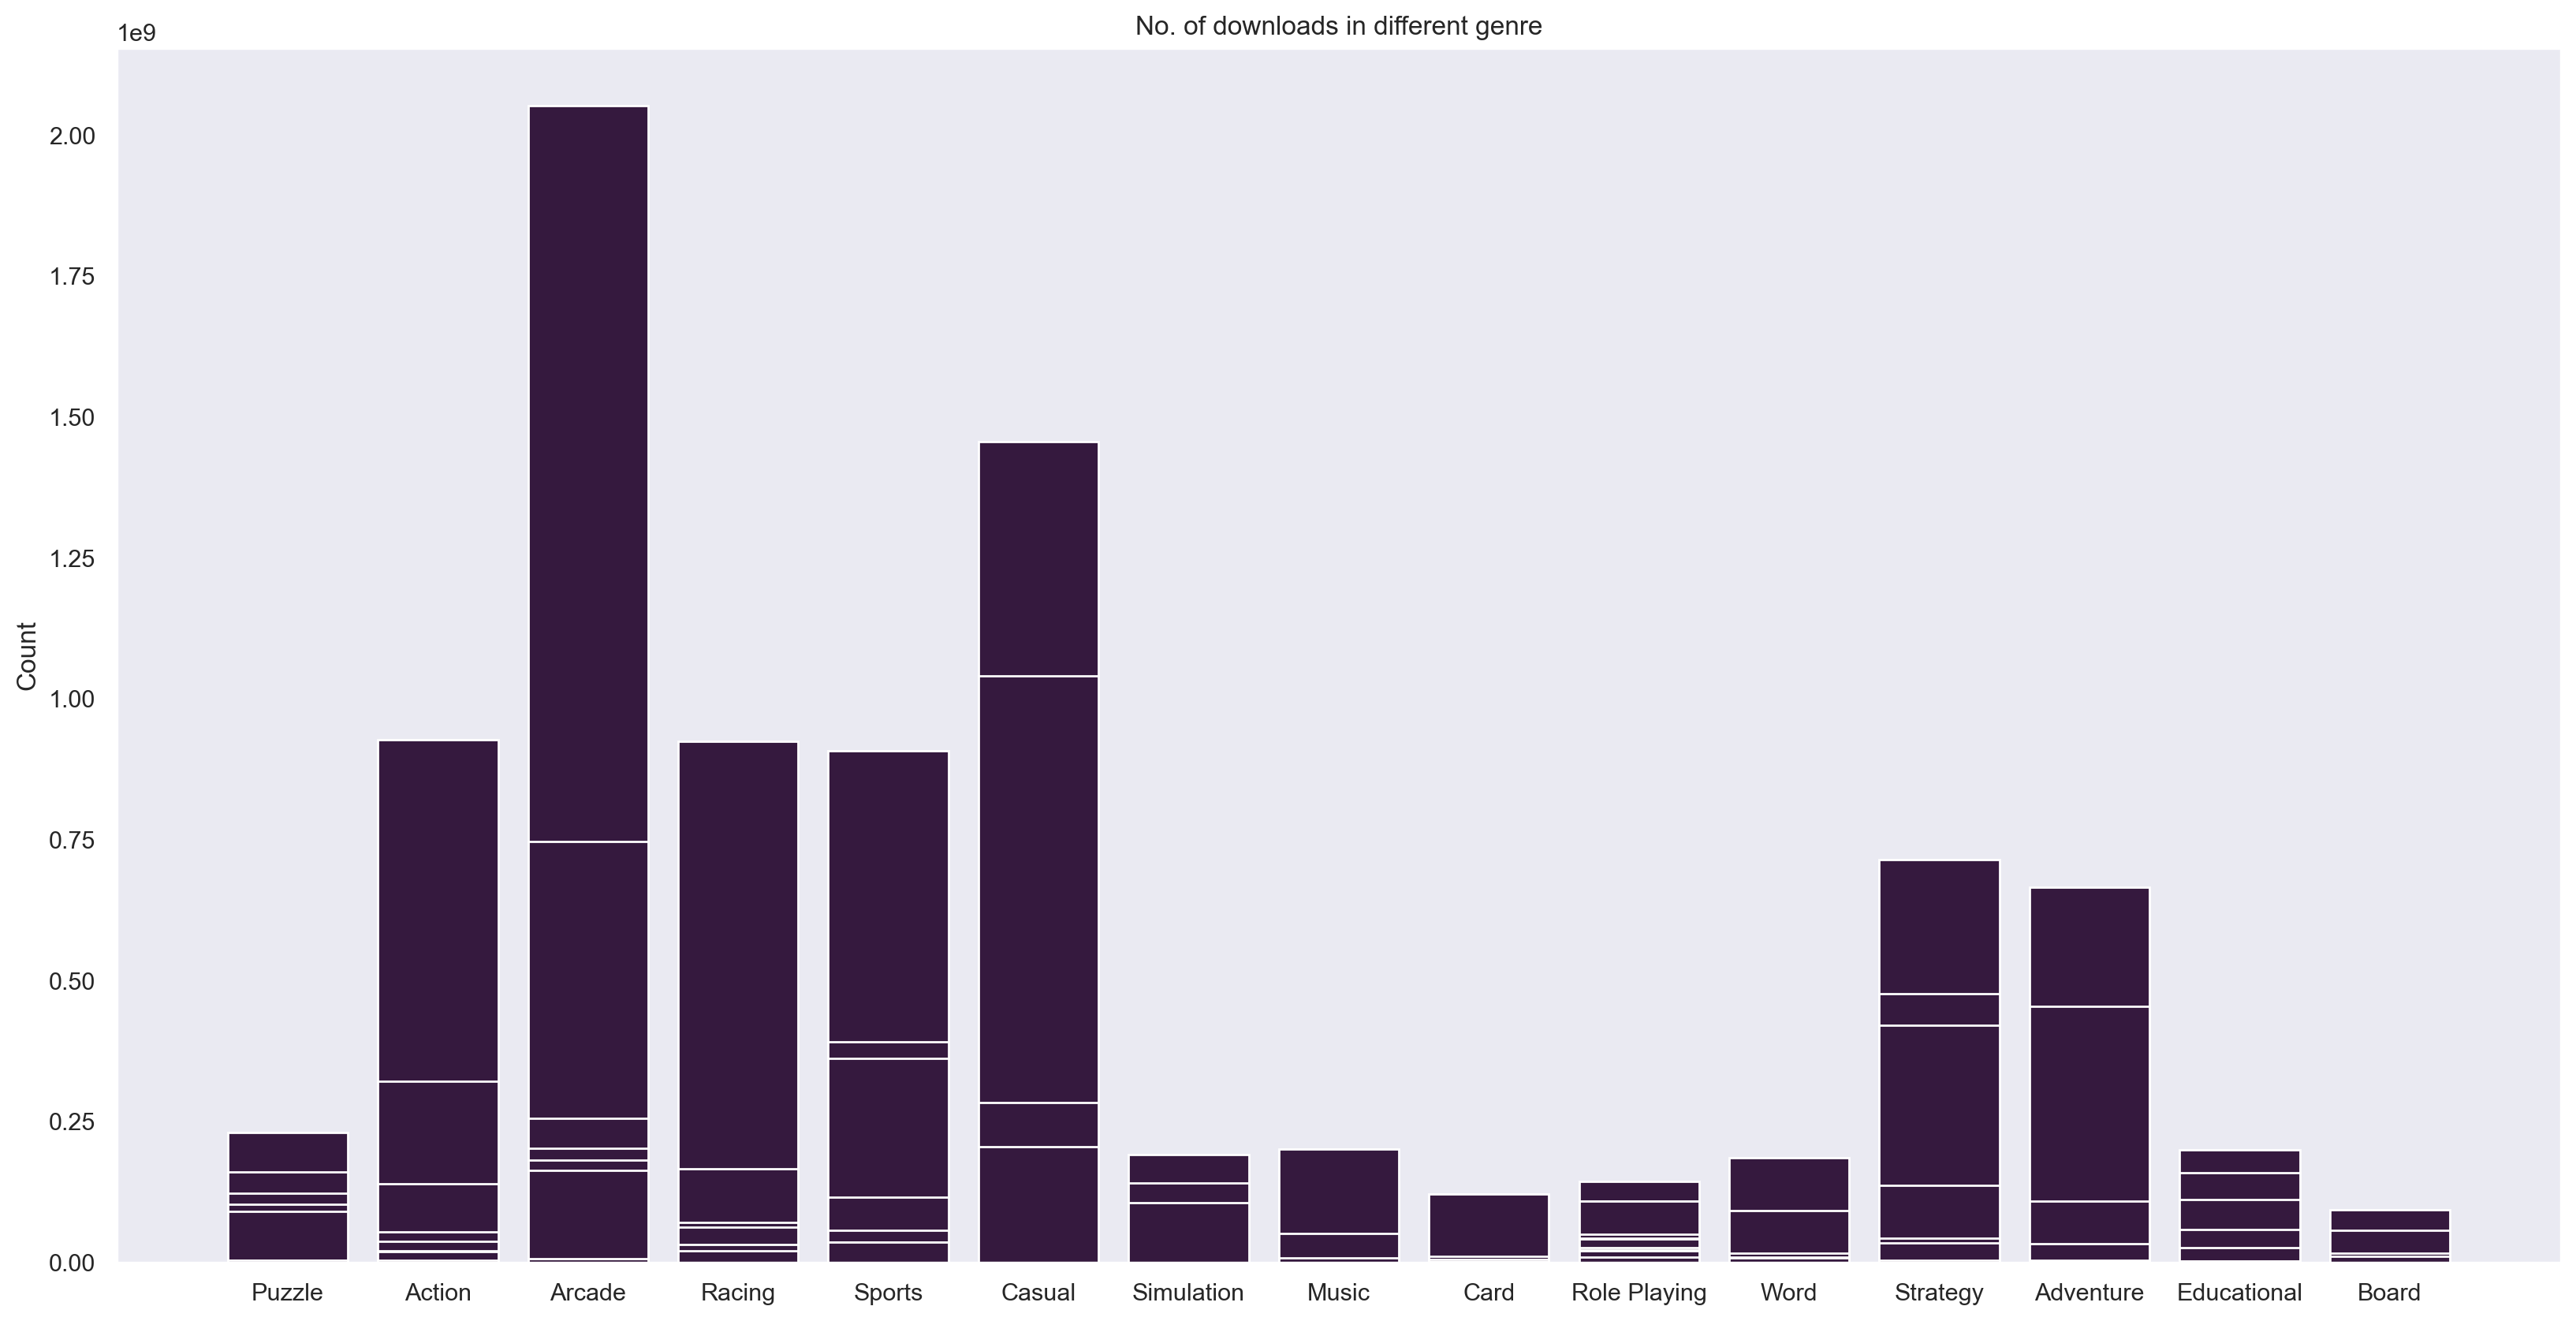

In [251]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20,10))

ax.bar(df['genre'], df["realInstalls"], label=df['genre'])

ax.set_ylabel('Count')
ax.set_title('No. of downloads in different genre')


plt.show()

In [93]:
df['score_round'] = df['score'].round(1)

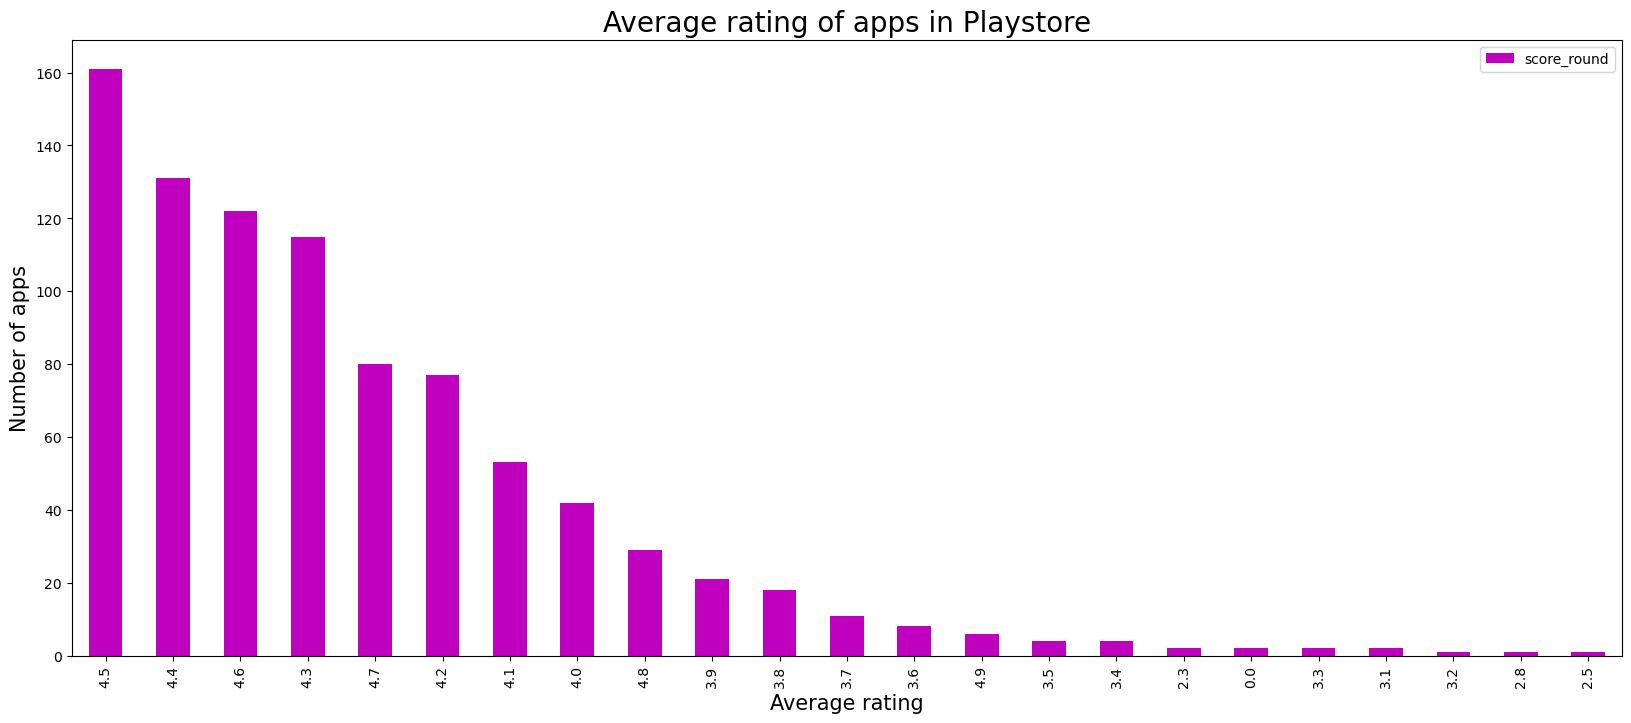

In [94]:
# Average app ratings

df['score_round'].value_counts().plot.bar(figsize=(20,8), color = 'm' )
plt.xlabel('Average rating',fontsize = 15 )
plt.ylabel('Number of apps', fontsize = 15)
plt.title('Average rating of apps in Playstore', fontsize = 20)
plt.legend()

In [102]:
def findtop10incategory(str):
    str = str.upper()
    top10 = df[df['genre'] == str]
    top10apps = top10.sort_values(by='realInstalls', ascending=False).head(10)
    plt.figure(figsize=(15,6), dpi=100)
    plt.title('Top 10 Installed Apps',size = 20)  
    graph = sns.barplot(x = top10apps.App, y = top10apps.Installs, palette= "icefire")
    graph.set_xticklabels(graph.get_xticklabels(), rotation= 45, horizontalalignment='right')

### Changing the datatype of Reviews column from string to int.

In [253]:
df["reviews"] = df['reviews'].astype(int)
df["ratings"] = df['ratings'].astype(int)
df["score"] = df['score'].astype(float)

In [254]:
df.describe()

minInstalls  realInstalls       score       ratings       reviews  \
count  8.930000e+02  8.930000e+02  893.000000  8.930000e+02  8.930000e+02   
mean   2.785351e+07  5.083312e+07    4.348306  1.092876e+06  4.802304e+04   
std    8.507597e+07  1.421520e+08    0.371476  3.984740e+06  1.835511e+05   
min    1.000000e+04  1.074300e+04    0.000000  0.000000e+00  0.000000e+00   
25%    1.000000e+06  1.654693e+06    4.220000  2.369100e+04  1.038000e+03   
50%    5.000000e+06  7.829650e+06    4.415842  1.097970e+05  5.007000e+03   
75%    1.000000e+07  3.433502e+07    4.558574  5.822120e+05  2.701100e+04   
max    1.000000e+09  2.052671e+09    4.902731  5.973886e+07  3.223319e+06   

            price       updated  
count  893.000000  8.930000e+02  
mean     0.369205  1.655884e+09  
std      1.377641  3.180477e+07  
min      0.000000  1.427986e+09  
25%      0.000000  1.661901e+09  
50%      0.000000  1.668137e+09  
75%      0.000000  1.669400e+09  
max     14.990000  1.670131e+09

In [297]:
score = df['score']
realInstalls = df['realInstalls']
reviews = df['reviews']
free = df['free']
price = df['price']
offersIAP = df['offersIAP']
adSupported = df['adSupported']

### Pairplot of score, No. of installs, No. of reviews, Price for paid or not

C:\Users\hp\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning:

divide by zero encountered in log10



Text(0.5, 1.0, 'Pairwise Plot - score, realInstalls, reviews, price')

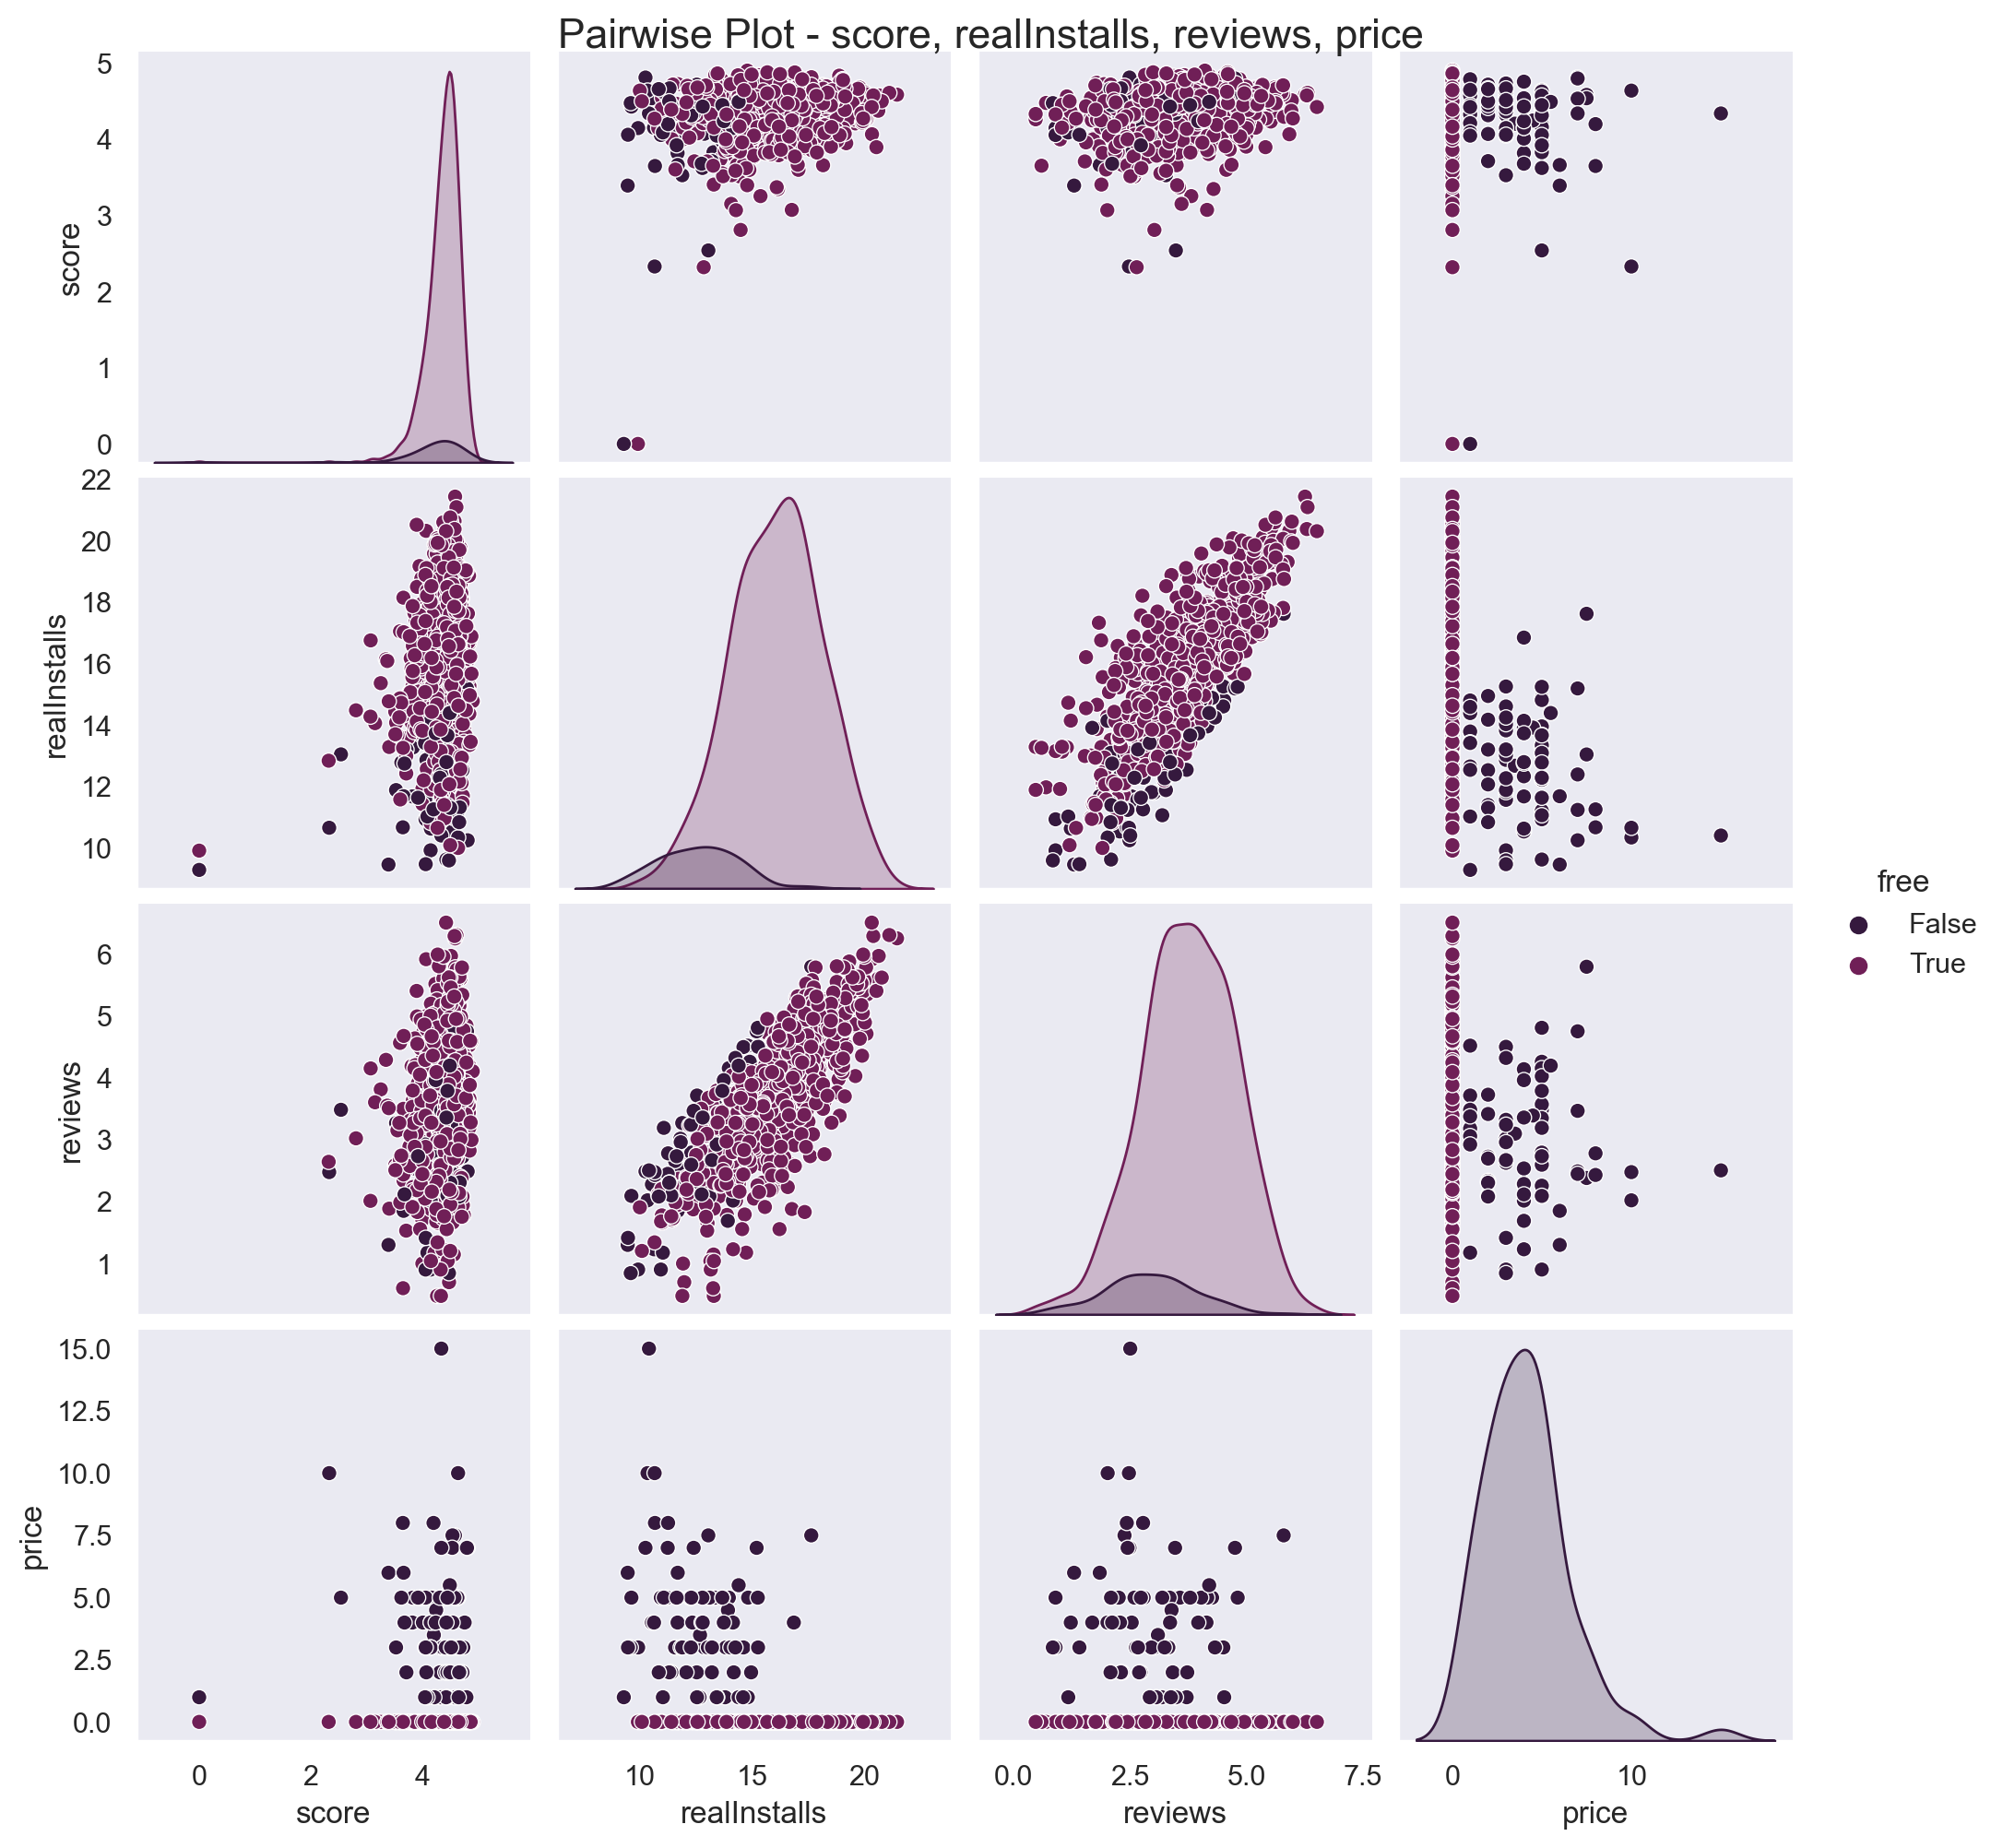

In [259]:
pt = sns.pairplot(pd.DataFrame(list(zip(score, np.log(realInstalls), np.log10(reviews), price, free)), 
                        columns=['score', 'realInstalls', 'reviews', 'price','free']), hue='free')
pt.fig.suptitle("Pairwise Plot - score, realInstalls, reviews, price",x=0.5, y=1.0, fontsize=16)

### Compairing paid and free apps in different genre

<AxesSubplot:xlabel='genre', ylabel='Count'>

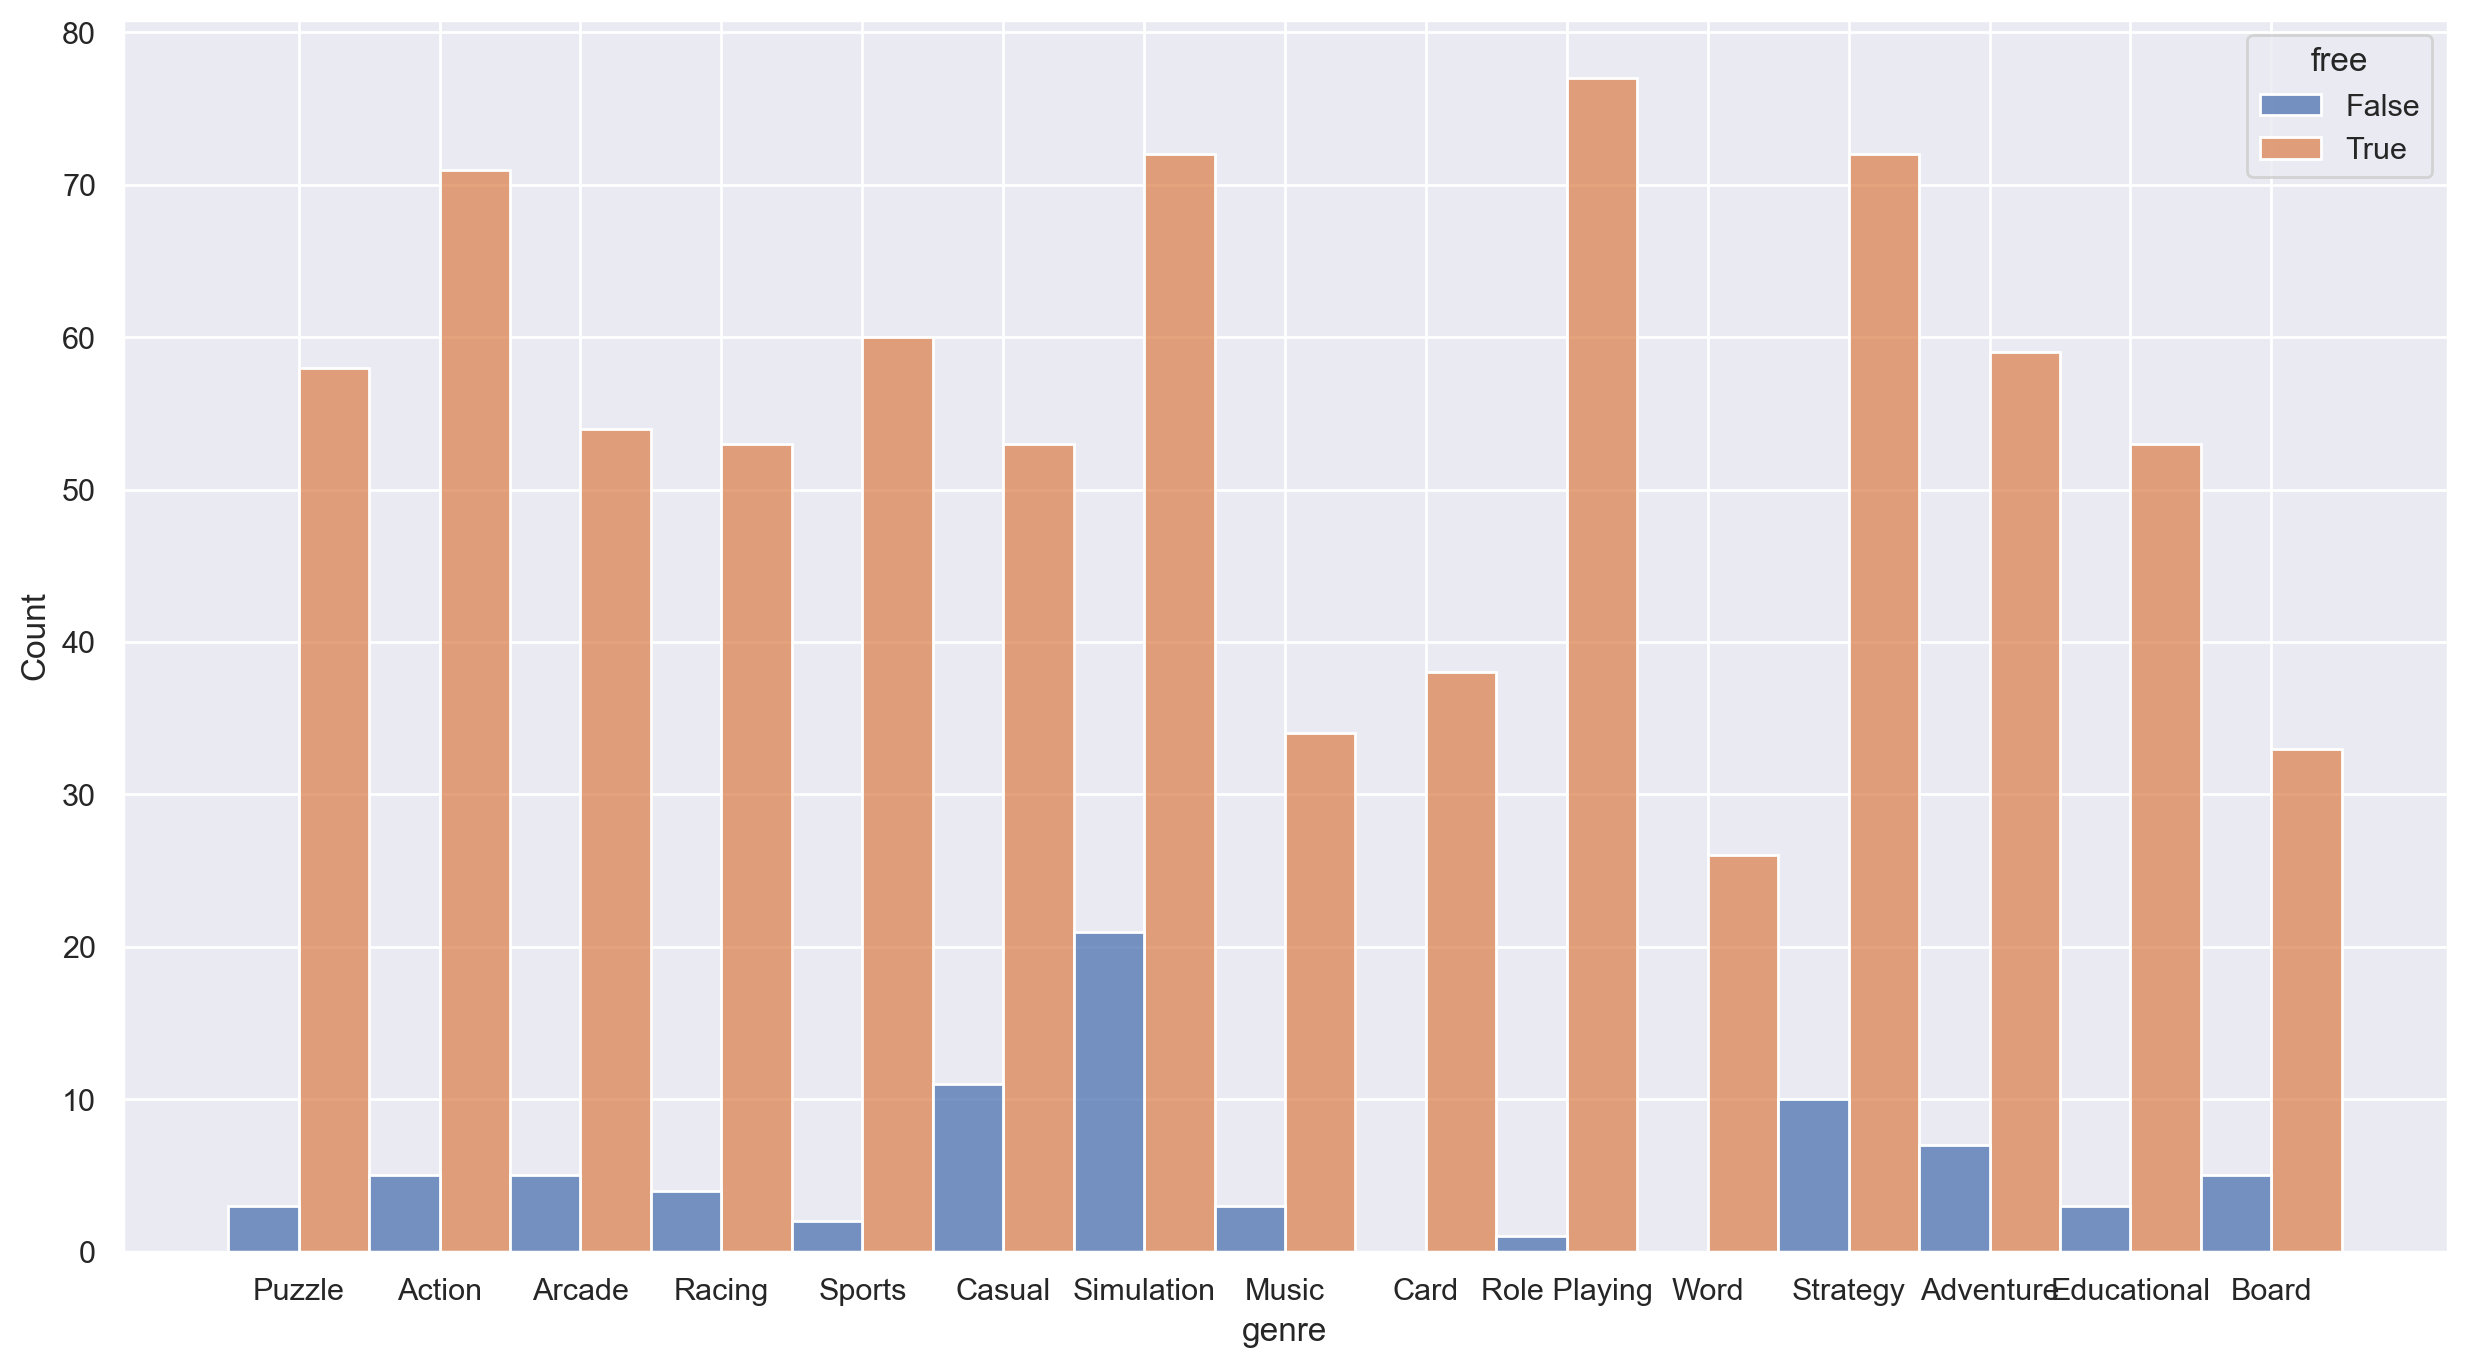

In [289]:
sns.set(rc={'figure.figsize':(15,8)})
sns.histplot(binwidth=4,
            x=df['genre'],
            hue=free,
            data=df,
            stat="count",
            multiple="dodge" )

In [ ]:
# Content rating of the apps
data = df['rating'].value_counts()
labels = ['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+','Adults only 18+', 'Unrated']

#create pie chart
plt.figure(figsize=(10,10))
explode=(0,0.1,0.1,0.1,0.0,1.3)
colors = ['C4', 'r', 'c', 'g', 'm', 'k']
plt.pie(data, labels = labels, colors = colors, autopct='%.2f%%',explode=explode,textprops={'fontsize': 15})
plt.title('Content Rating',size=20,loc='center')
plt.legend()

### Pairplot of score, No. of installs, No. of reviews, Price for In App Purchase

C:\Users\hp\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning:

divide by zero encountered in log10



Text(0.5, 1.0, 'Pairwise Plot - score, realInstalls, reviews, price')

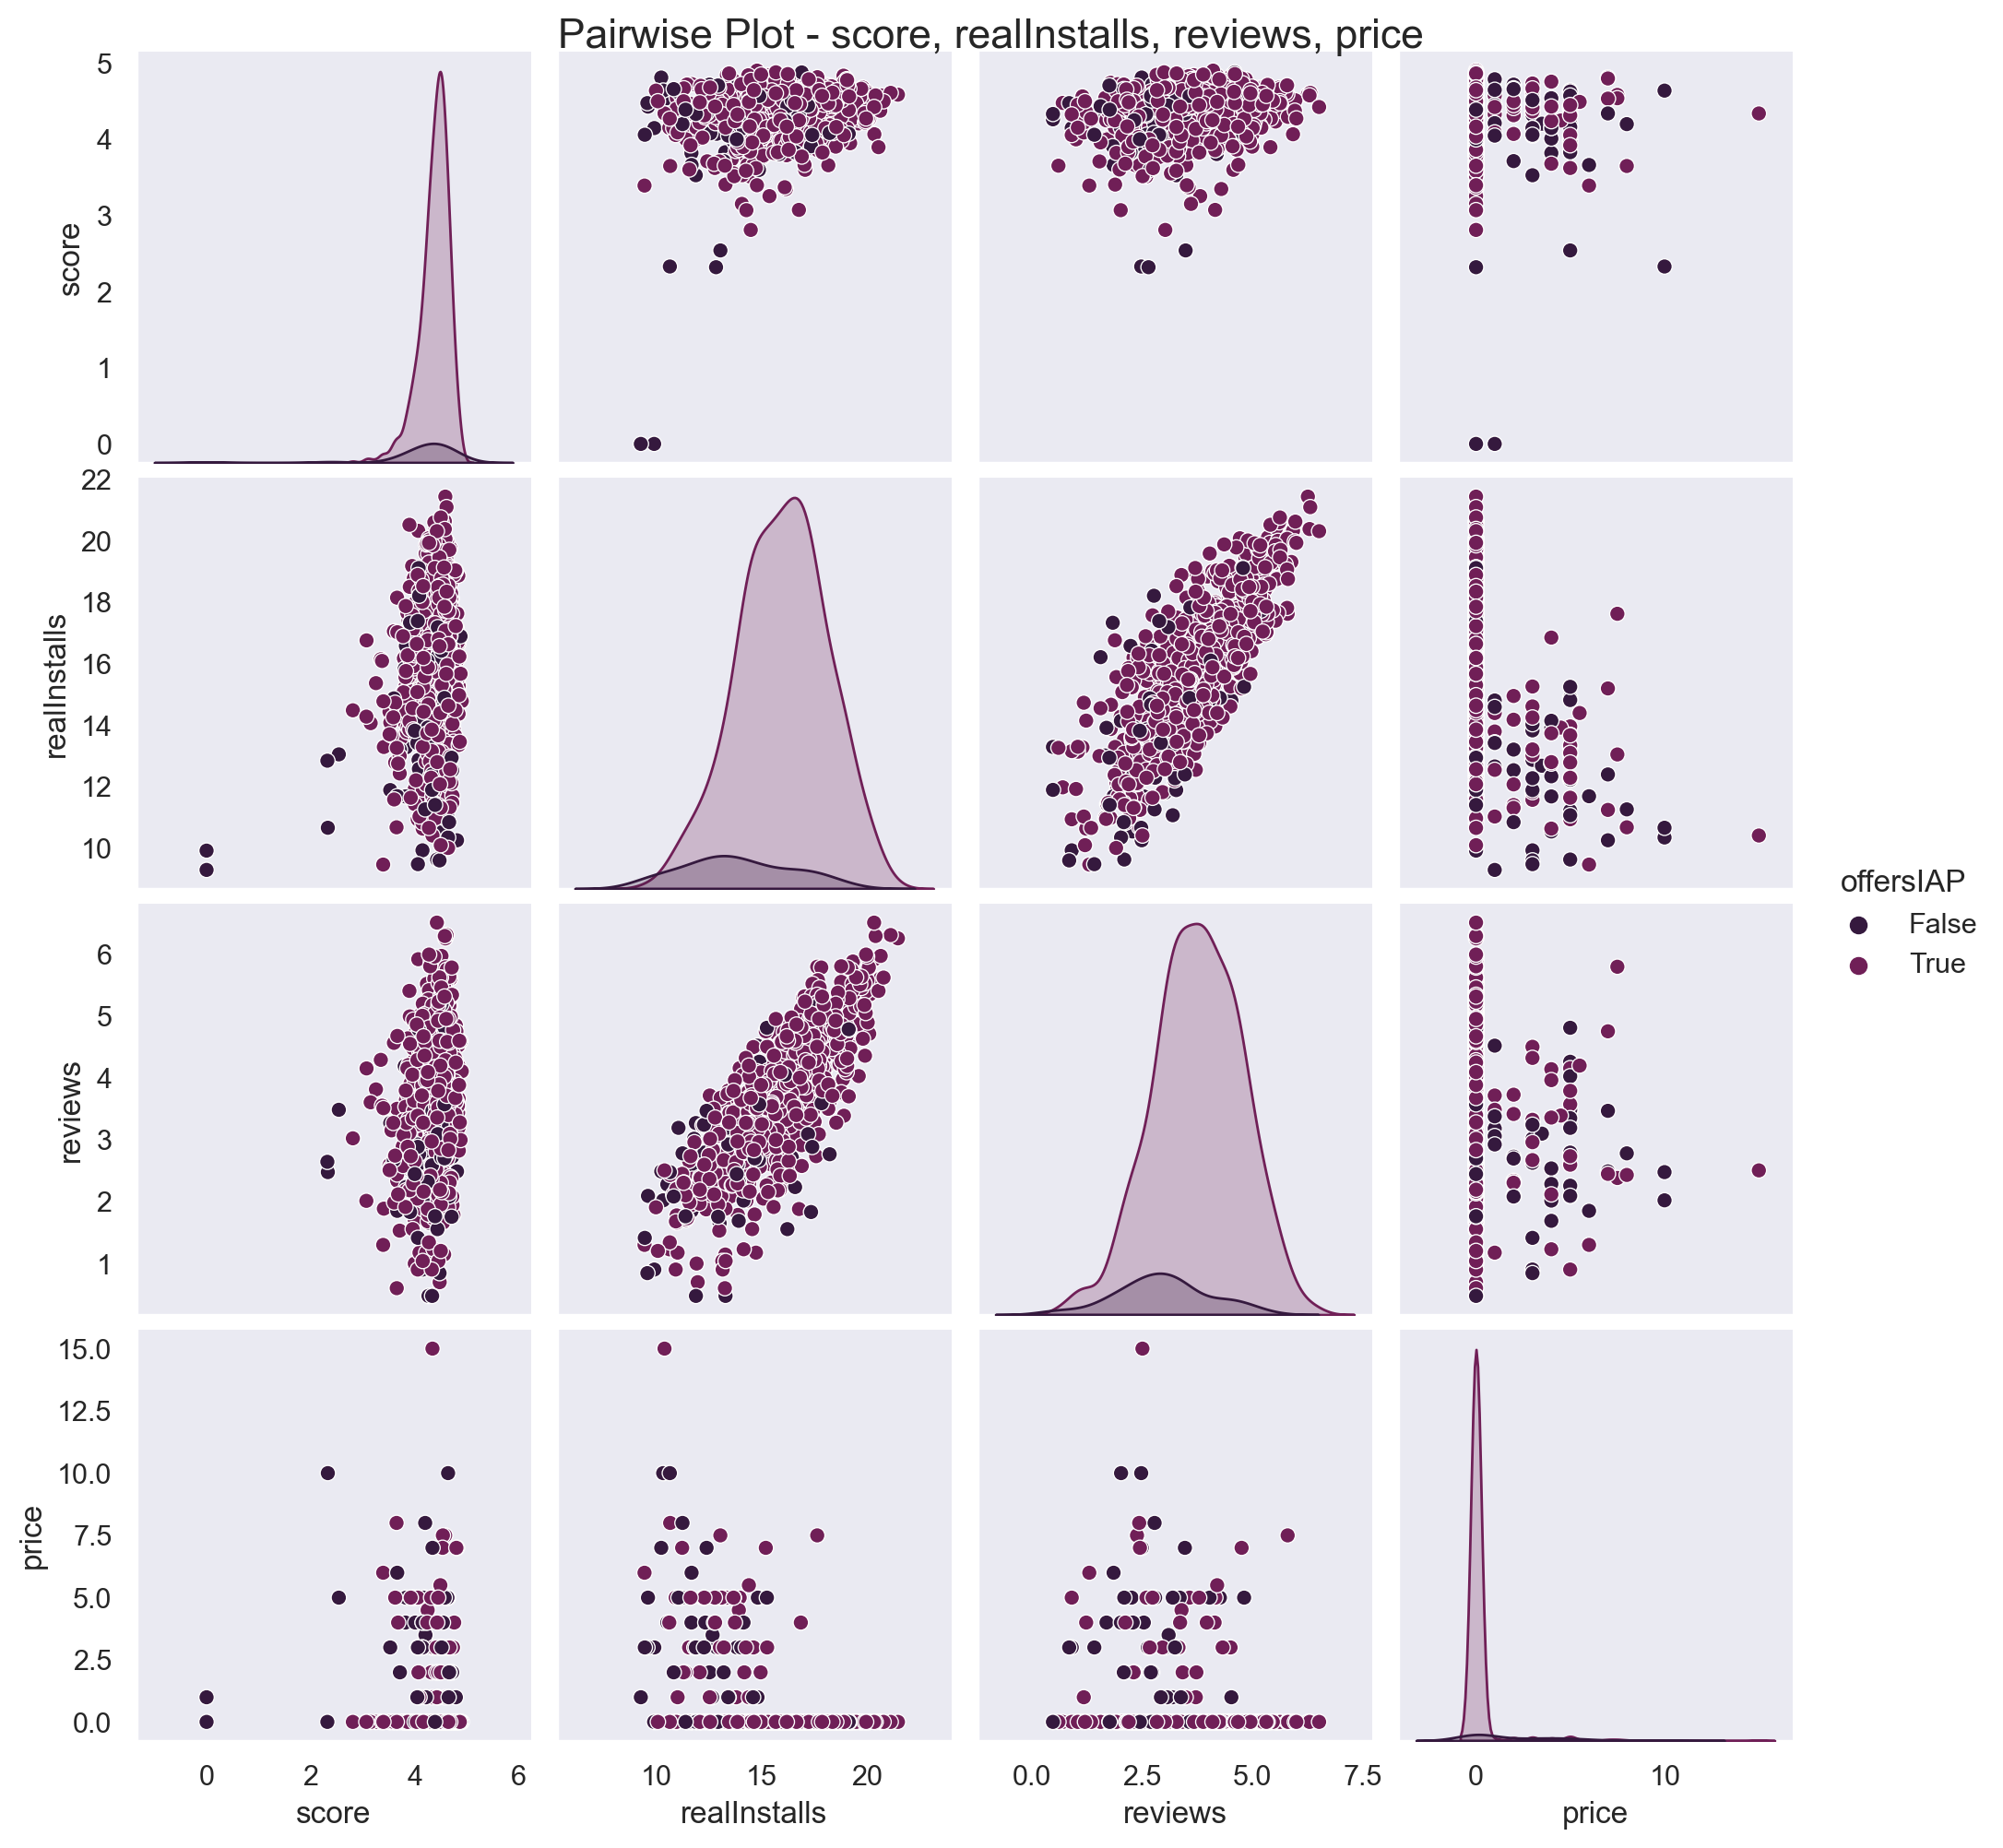

In [262]:
pt1 = sns.pairplot(pd.DataFrame(list(zip(score, np.log(realInstalls), np.log10(reviews), price, offersIAP)), 
                        columns=['score', 'realInstalls', 'reviews', 'price','offersIAP']), hue='offersIAP')
pt1.fig.suptitle("Pairwise Plot - score, realInstalls, reviews, price",x=0.5, y=1.0, fontsize=16)

### Compairing apps offer IAP in different genre

<AxesSubplot:xlabel='genre', ylabel='Count'>

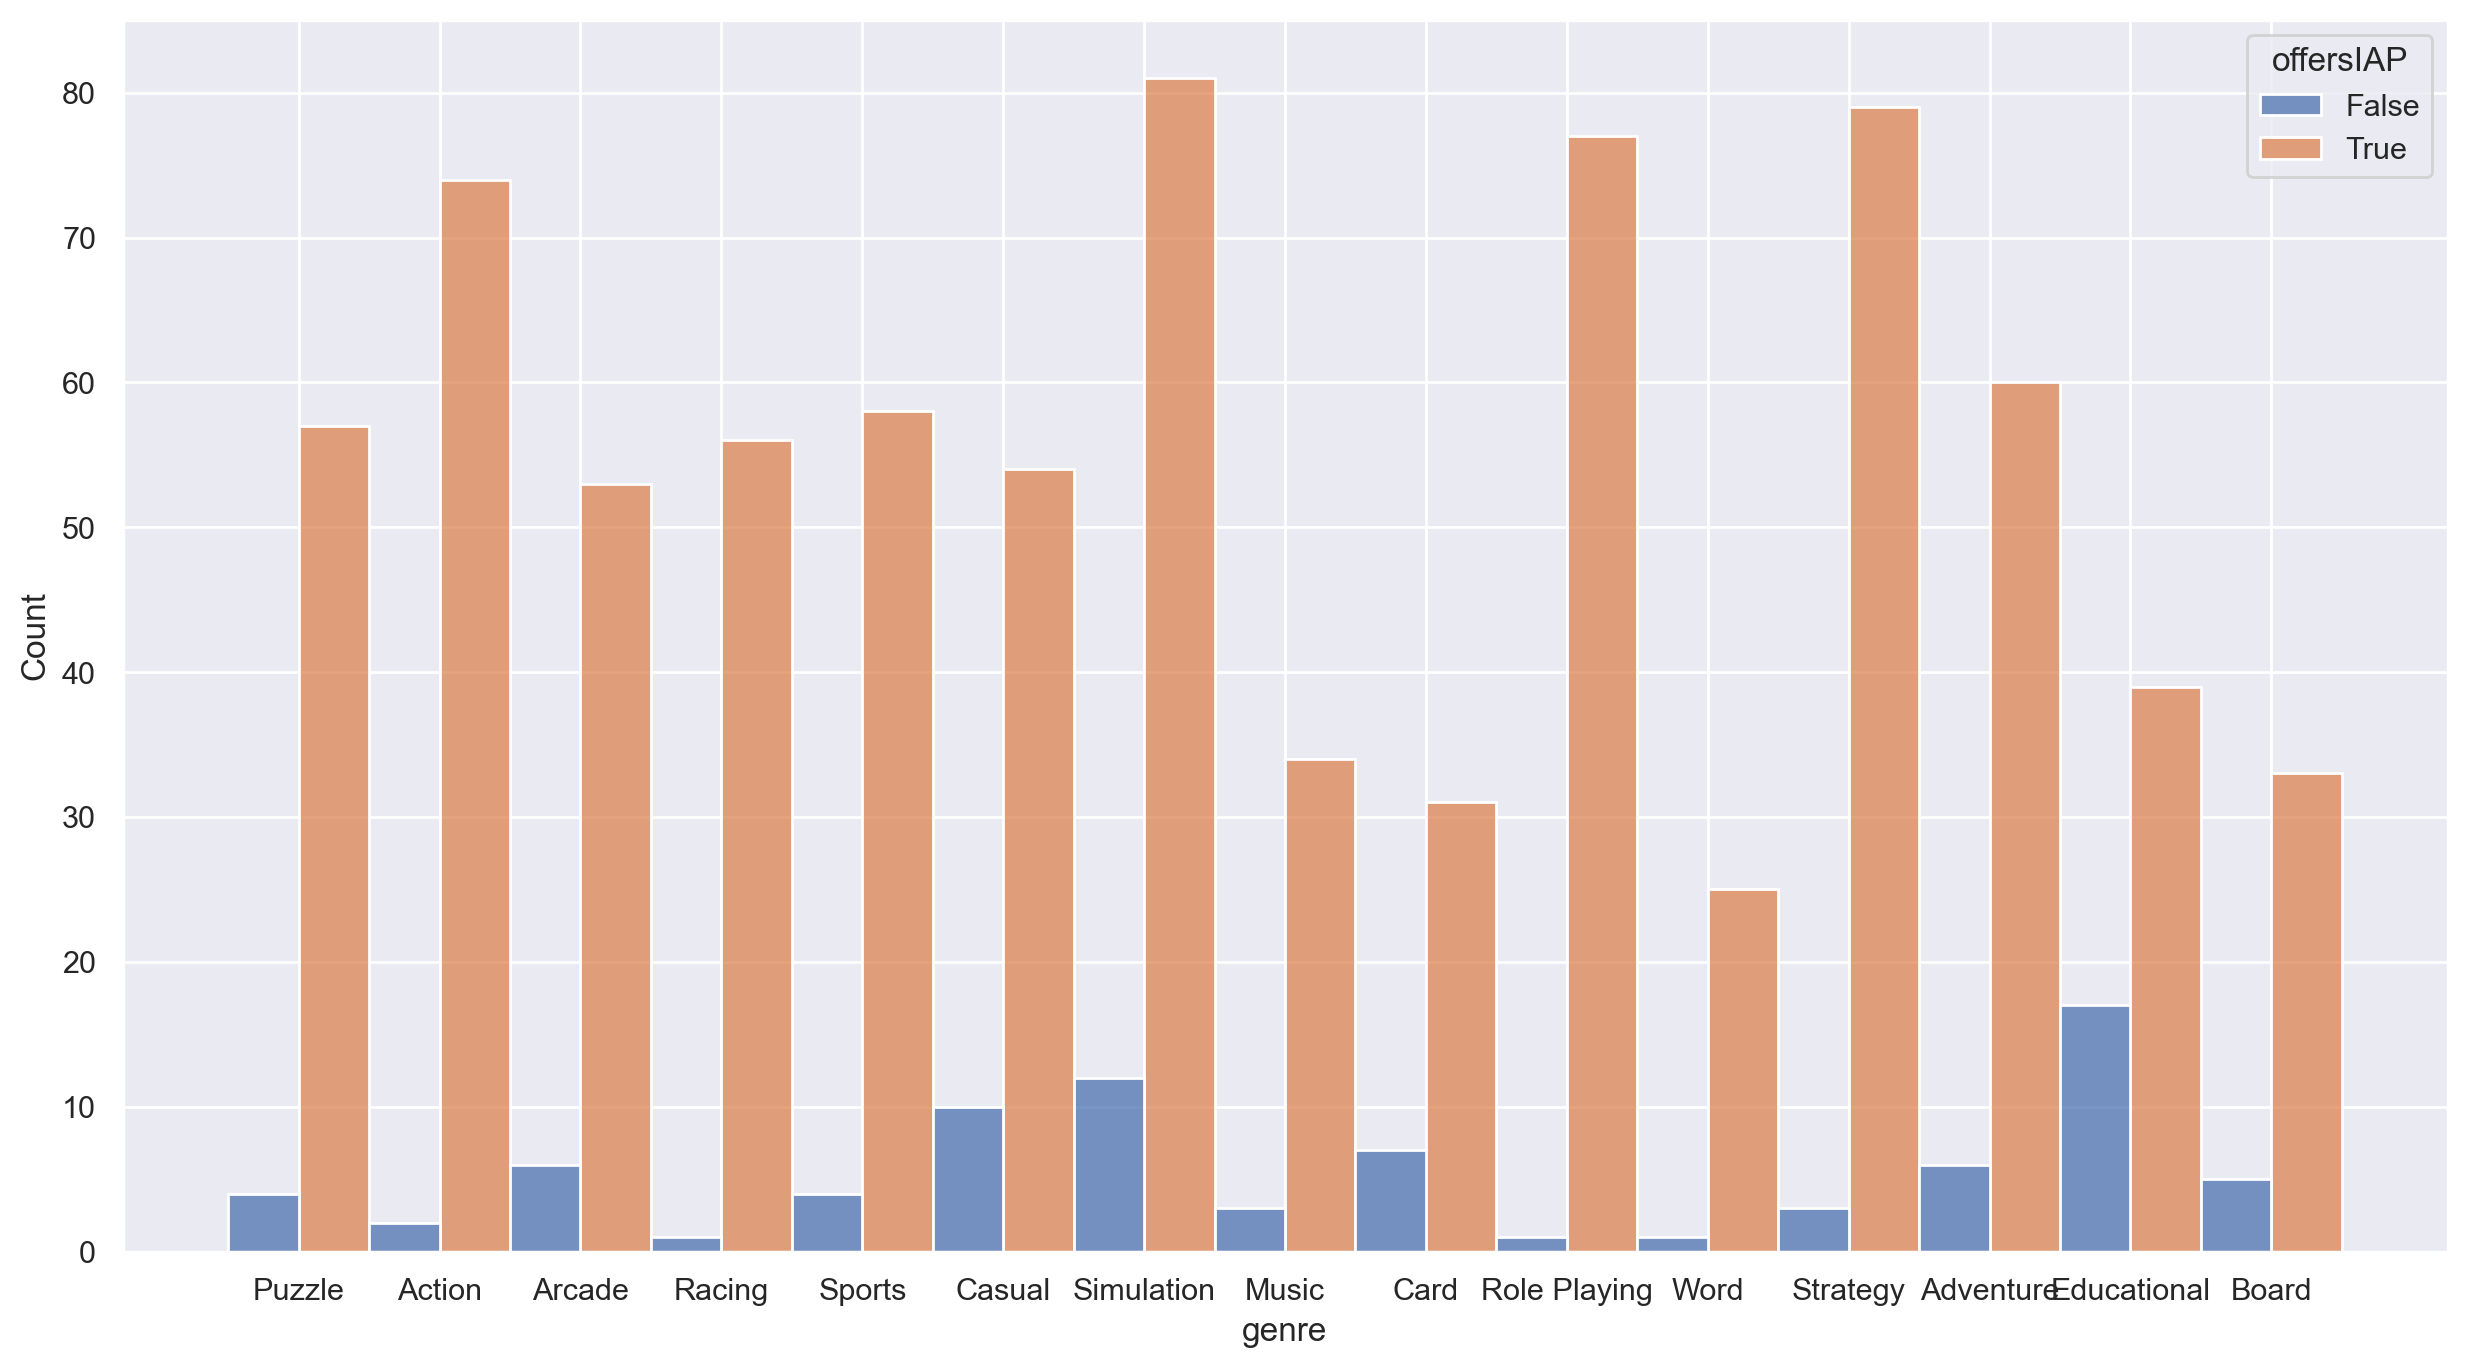

In [291]:
sns.set(rc={'figure.figsize':(15,8)})
sns.histplot(binwidth=4,
            x=df['genre'],
            hue=offersIAP,
            data=df,
            stat="count",
            multiple="dodge" )

### Pairplot of score, No. of installs, No. of reviews, Price for ad support or not

C:\Users\hp\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning:

divide by zero encountered in log10



Text(0.5, 1.0, 'Pairwise Plot - score, realInstalls, reviews, price')

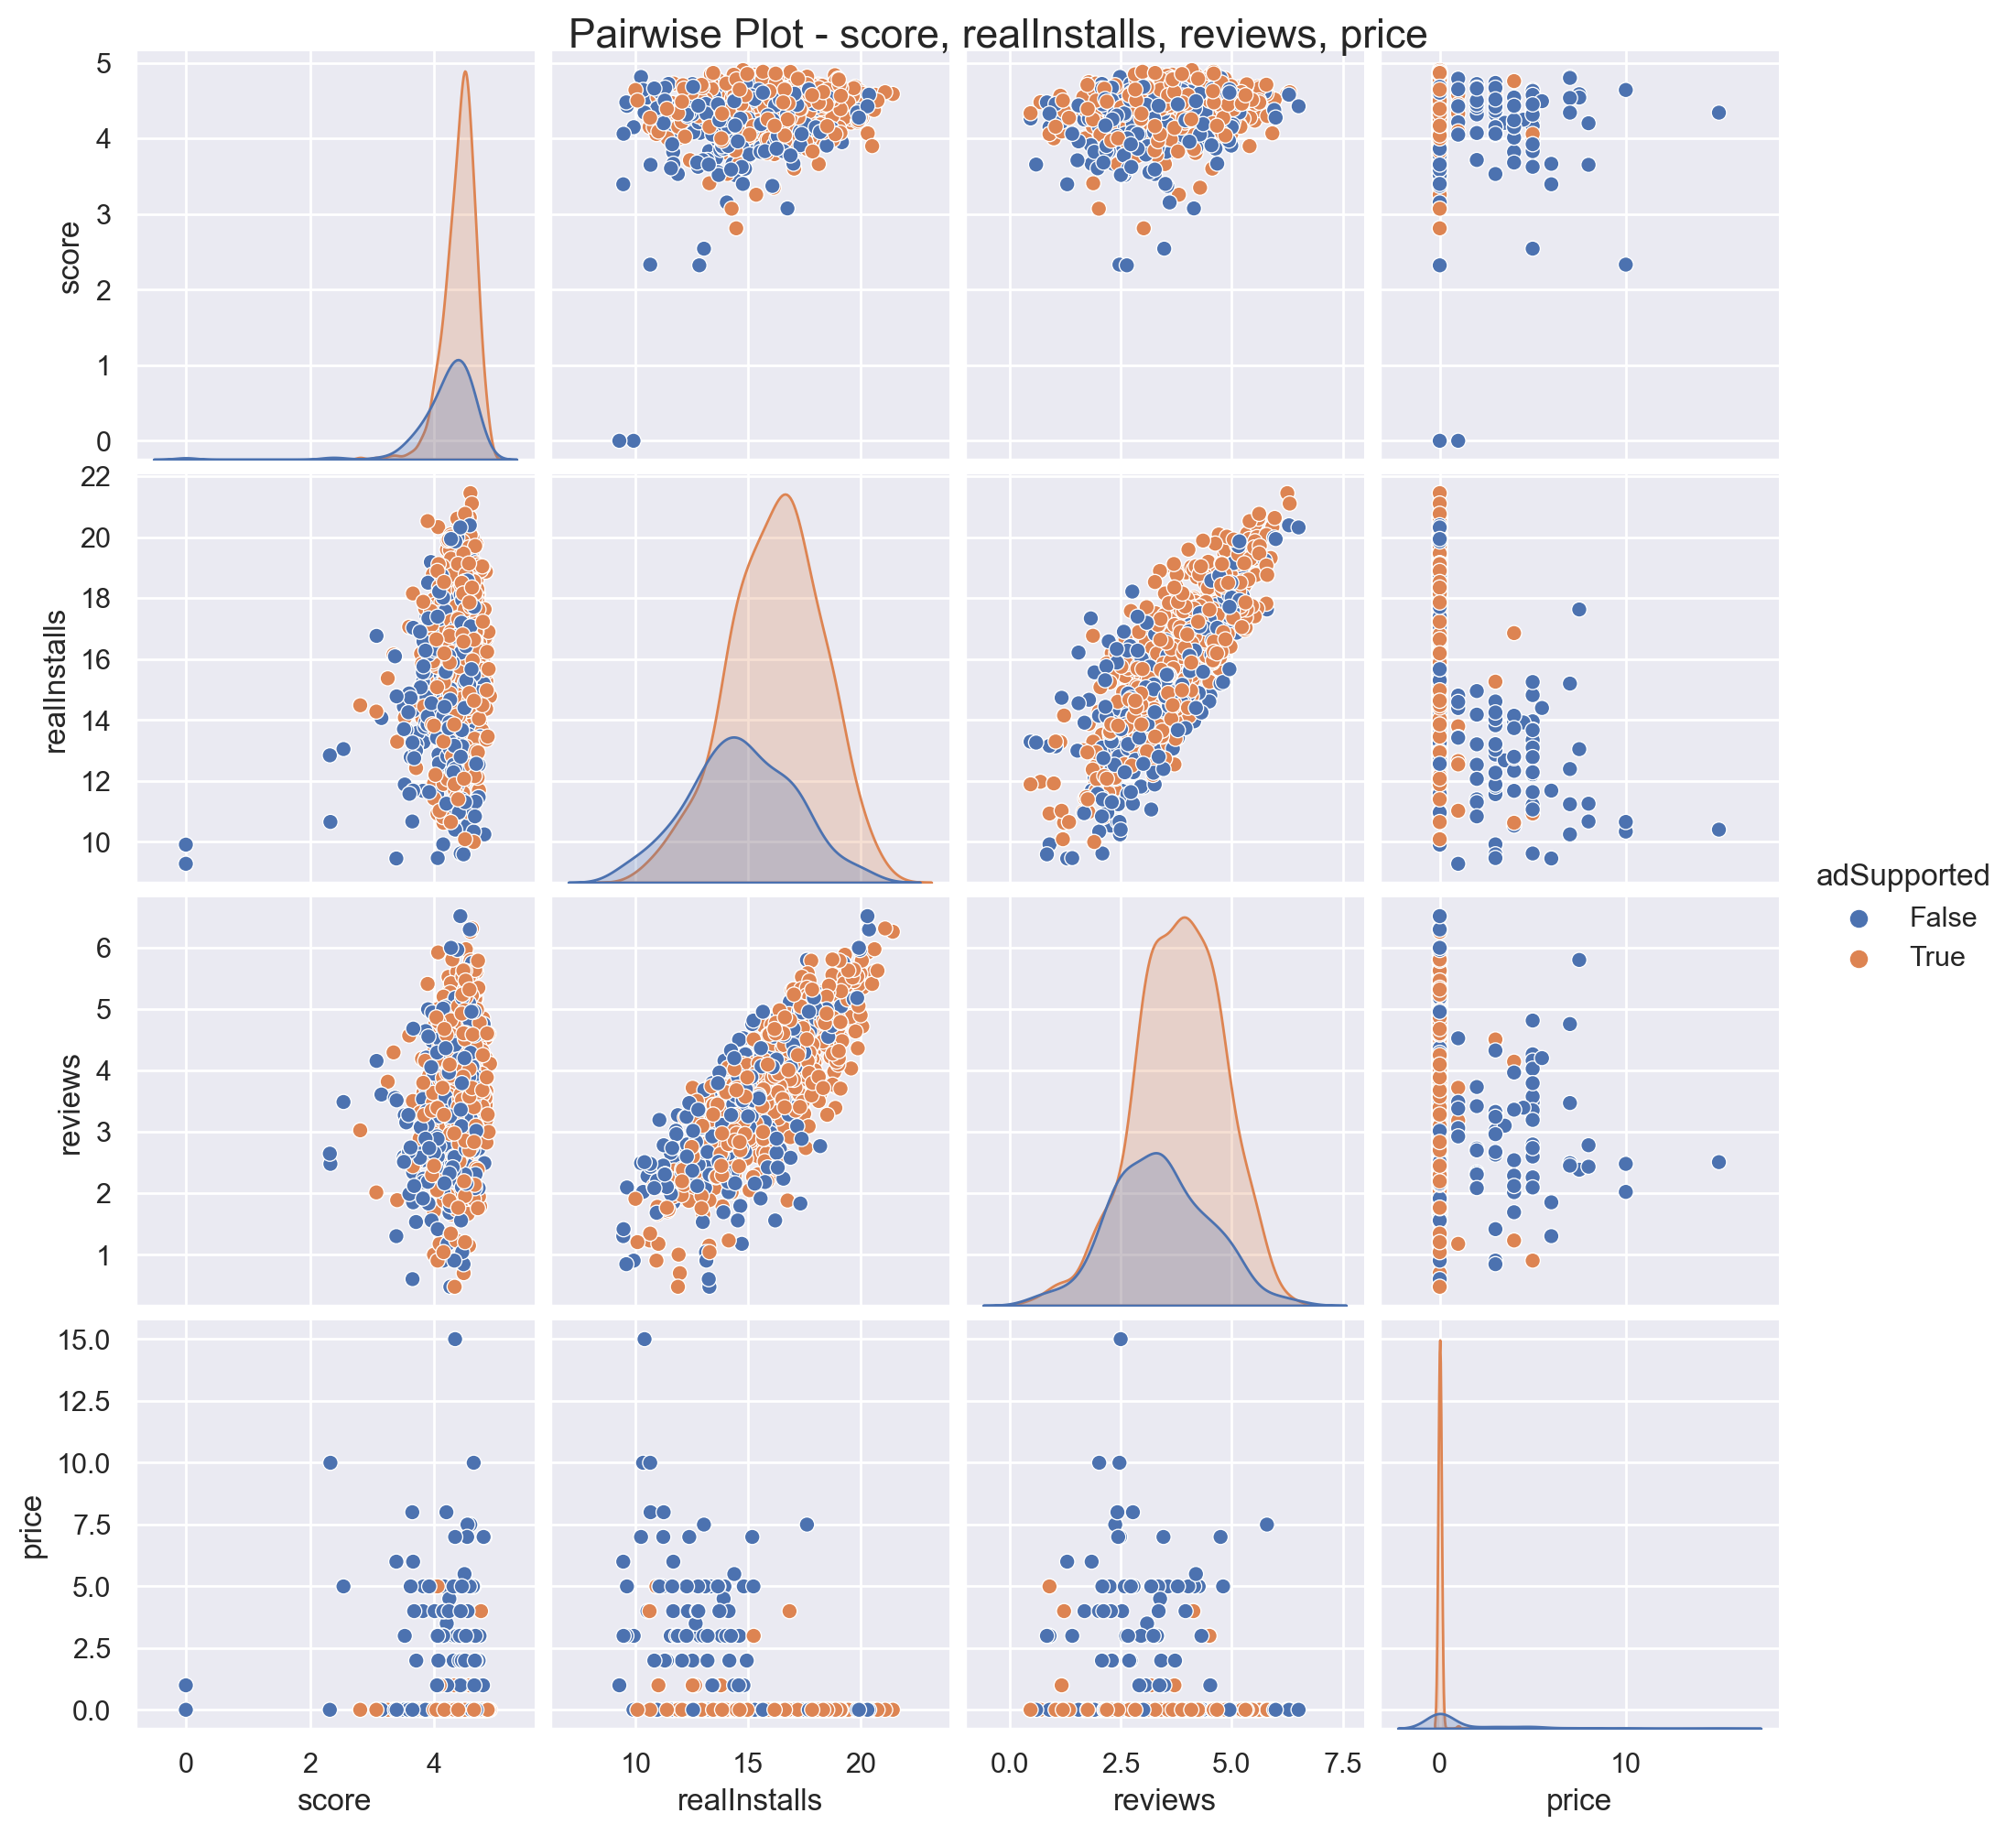

In [298]:
pt2 = sns.pairplot(pd.DataFrame(list(zip(score, np.log(realInstalls), np.log10(reviews), price, adSupported)), 
                        columns=['score', 'realInstalls', 'reviews', 'price','adSupported']), hue='adSupported')
pt2.fig.suptitle("Pairwise Plot - score, realInstalls, reviews, price",x=0.5, y=1.0, fontsize=16)

### Compairing ad support in different genre

<AxesSubplot:xlabel='genre', ylabel='Count'>

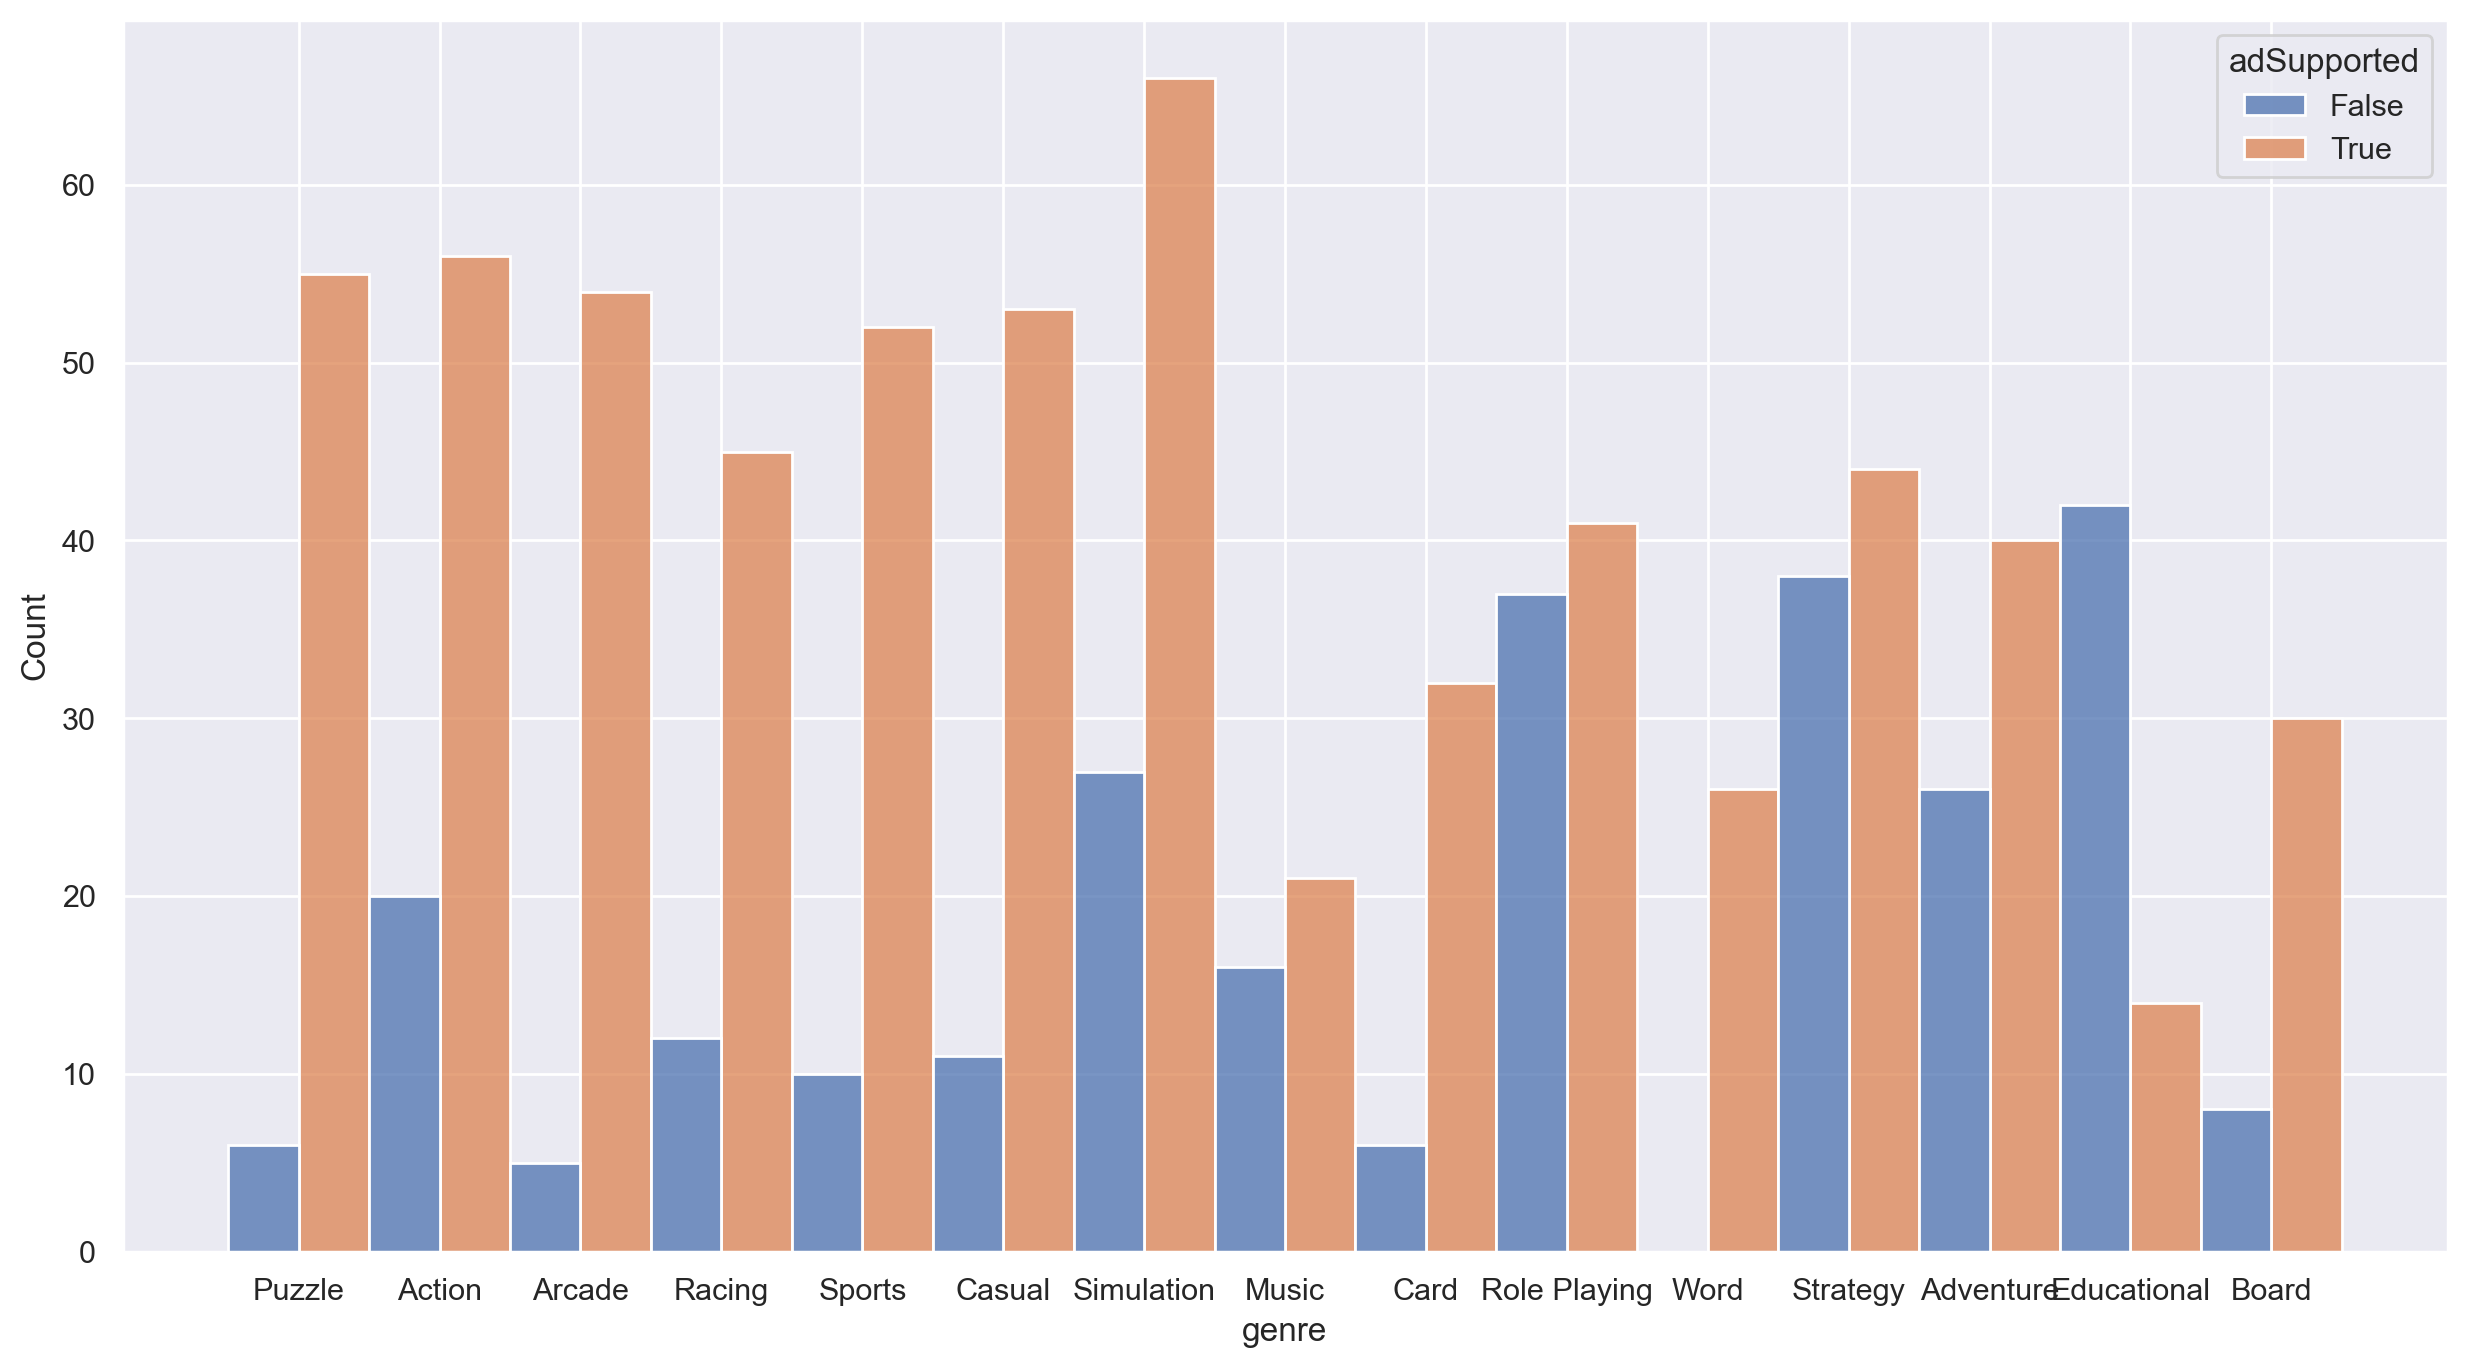

In [299]:
sns.set(rc={'figure.figsize':(15,8)})
sns.histplot(binwidth=4,
            x=df['genre'],
            hue=adSupported,
            data=df,
            stat="count",
            multiple="dodge" )

Text(0.5, 1.0, 'Corelation Heatmap for Playstore game Data')

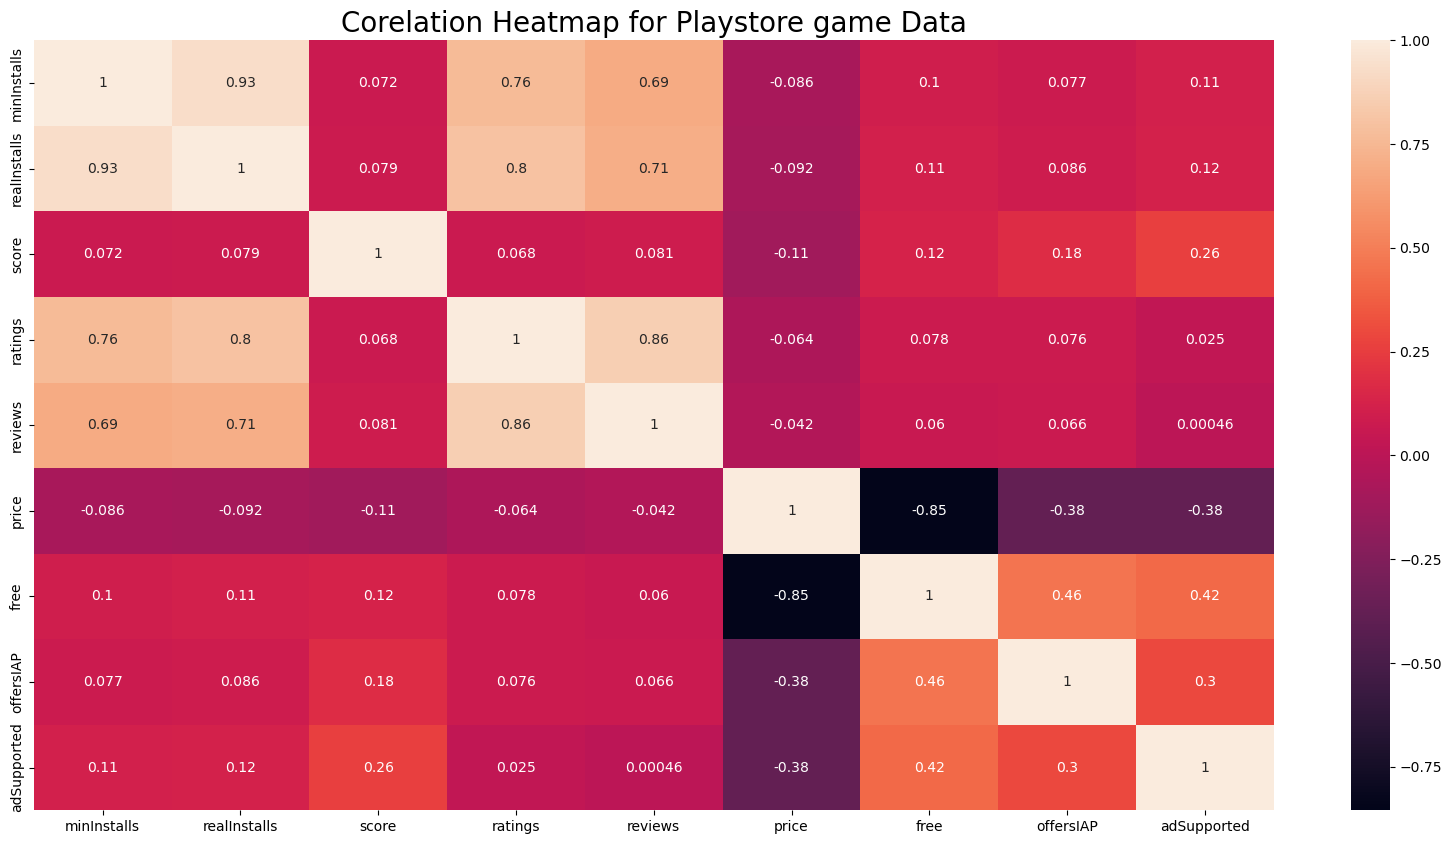

In [72]:
# Heat map for all play_store games
plt.figure(figsize = (20,10))
sns.heatmap(df.corr(), annot= True)
plt.title('Corelation Heatmap for Playstore game Data', size=20)

# Reviews on app

### Scraping app reviews

In [200]:
# app_reviews = []

# # Loop through all the app packages and collect review for each of them
# for ap in tqdm(df['appId']):
#     for score in list(range(1, 6)):
#         for sort_order in [Sort.MOST_RELEVANT, Sort.NEWEST]:
#             rvs, _ = reviews(
#                 ap,
#                 lang='en',
#                 country=str(df_data['country'][sort_order]),
#                 sort=sort_order,
#                 count= 50 if score == 3 else 100,
#                 filter_score_with=score
#             )
#         for r in rvs:
#             r['sortOrder'] = 'most_relevant' if sort_order == Sort.MOST_RELEVANT else 'newest'
#             r['appId'] = ap

#         app_reviews.extend(rvs)

100%|██████████████████████████████████████████████████████████████████████████████| 897/897 [1:01:43<00:00,  4.13s/it]


In [201]:
# print("We have scraped: ", len(app_reviews), " reviews")

We have scraped:  365703  reviews


In [203]:
# app_reviews_df = pd.DataFrame(app_reviews)
# app_reviews_df.to_csv('c://loads/Review.csv', index=None, header=True)

In [251]:
review_data=pd.read_csv('C:/loads/Reviews.csv')

In [252]:
review_data

reviewId                       userName  \
0       096f6855-deb8-4b8e-81e6-233c54063791                       Himi lru   
1       2f919a10-ddd5-4543-b9f5-bc33eaa4c435             Sahrol Mohd sharip   
2       837924c3-5b5c-4061-9903-1226e1f35bc3                Marimel Calaton   
3       e6ef91af-3eb4-4a88-97b2-d849a5def1c5                  Chandan Kumar   
4       b44030f4-ac78-4e8c-94b8-fba2a6be8aeb  Mannatdeepkour Mannatdeepkour   
...                                      ...                            ...   
632570  c1b005f7-ae39-46f5-90c5-81baf3780cb5                  A Google user   
632571  dd5487bd-990a-47d5-827a-955519e1a96b                  A Google user   
632572  40e10514-0dca-469c-932c-bf80f72f0dc8                  A Google user   
632573  d2910905-eb19-4b30-8ced-45a71ed76d25                  A Google user   
632574  3ebce987-87d8-41b6-bac7-63c75789012f                  A Google user   

                                                userImage  \
0       https://play-lh.googleusercontent.com/a-/ACNPE...   
1       https://play-lh.googleusercontent.com/a/ALm5wu...   
2       https://play-lh.googleusercontent.com/a-/ACNPE...   
3       https://play-lh.googleusercontent.com/a/ALm5wu...   
4       https://play-lh.googleusercontent.com/a/ALm5wu...   
...                                                   ...   
632570  https://play-lh.googleusercontent.com/EGemoI2N...   
632571  https://play-lh.googleusercontent.com/EGemoI2N...   
632572  https://play-lh.googleusercontent.com/EGemoI2N...   
632573  https://play-lh.googleusercontent.com/EGemoI2N...   
632574  https://play-lh.googleusercontent.com/EGemoI2N...   

                                                  content  score  \
0                                                    Lame      1   
1                                          Can't download      1   
2                                              Worst game      1   
3                                                  Aarush      1   
4       Worst game cheated with tennis ball team plz u...      1   
...                                                   ...    ...   
632570  l payed and also got the free one. l love it a...      5   
632571                                               like      5   
632572                               This game is cute...      5   
632573                      ...This was adorable. 5 stars      5   
632574                                     best game ever      5   

        thumbsUpCount reviewCreatedVersion                   at replyContent  \
0                   0                7.9.3  2022-12-02 06:56:11          NaN   
1                   0                  NaN  2022-12-02 04:35:53          NaN   
2                   0                7.9.3  2022-12-01 11:08:04          NaN   
3                   0                  NaN  2022-11-30 08:01:21          NaN   
4                   0                7.9.3  2022-11-30 02:25:46          NaN   
...               ...                  ...                  ...          ...   
632570             23                  1.8  2018-12-26 06:50:13          NaN   
632571              1                  NaN  2018-12-26 02:08:53          NaN   
632572              5                  NaN  2018-12-25 20:05:08          NaN   
632573              7                  1.8  2018-12-25 18:18:38          NaN   
632574              4                  1.8  2018-12-25 17:38:22          NaN   

       repliedAt sortOrder                    appId  
0            NaN    newest  com.JindoBlu.Antistress  
1            NaN    newest  com.JindoBlu.Antistress  
2            NaN    newest  com.JindoBlu.Antistress  
3            NaN    newest  com.JindoBlu.Antistress  
4            NaN    newest  com.JindoBlu.Antistress  
...          ...       ...                      ...  
632570       NaN    newest   com.tribeplay.pandapet  
632571       NaN    newest   com.tribeplay.pandapet  
632572       NaN    newest   com.tribeplay.pandapet  
632573       NaN    newest   com.tri

In [11]:
pip install TextBlob

Note: you may need to restart the kernel to use updated packages.


In [253]:
from textblob import TextBlob


In [254]:
content = review_data['content'].astype(str)

In [255]:
Sentences= []
Sentiment = []
Polarity = []
subjectivity = []
Sentences= content
for sentence in Sentences:
    res = TextBlob(sentence)
    Polarity.append(res.sentiment.polarity)
    subjectivity.append(res.sentiment.subjectivity)
    Sentiment.append(res.sentiment)
    

In [265]:
review_data['Polarity'] = Polarity
review_data['subjectivity'] = subjectivity

In [266]:
review_data['subjectivity'].head()

0    0.75
1    0.00
2    0.70
3    0.00
4    0.70
Name: subjectivity, dtype: float64

In [271]:
review_data['sentiment']=review_data['Polarity'].apply(lambda x: 'Positive'  if x>=0.3   else ('Neutral' if -0.3<=x<=0.3 else 'Negative'))

In [272]:
review_data['sentiment']

0         Negative
1          Neutral
2         Negative
3          Neutral
4         Negative
            ...   
632570     Neutral
632571     Neutral
632572     Neutral
632573    Positive
632574    Positive
Name: sentiment, Length: 632575, dtype: object

In [74]:
del review_data['reviewCreatedVersion']
del review_data['replyContent']
del review_data['repliedAt']

Text(0.5, 1.0, ' Heatmap for merged Dataframe')

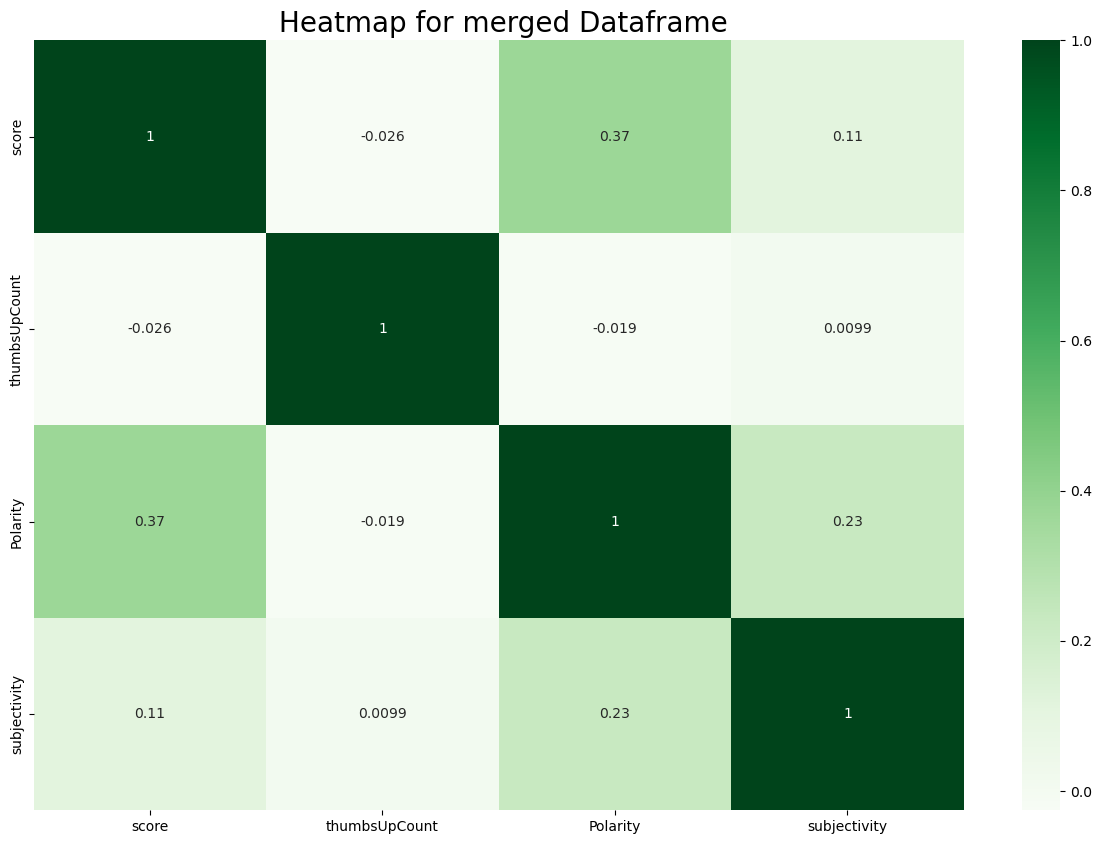

In [76]:
# Correlation heatmap
# Heat Map for the merged data frame
plt.figure(figsize = (15,10))
sns.heatmap(review_data.corr(), annot= True, cmap='Greens')
plt.title(' Heatmap for merged Dataframe', size=20)
   

# Hypothesis

In [256]:
df["free"] = df["free"].astype(int)
df["offersIAP"]=df["offersIAP"].astype(int)
df["adSupported"]=df["adSupported"].astype(int)

data_Arcade=df[df['genre']=="Arcade"]

data_free=data_Arcade[data_Arcade['free']==1]
data_paid=data_Arcade[data_Arcade['free']==0]
# dataIAP=df[df['offersIAP']==1]
data_Arcade.head()
# dataAD=df[df["adSupported"]==1]

title  \
252                 Subway Surfers   
253  Galaxy Shooter - Space Attack   
254                      Smash Hit   
255                     Red Ball 4   
256                   Fruit Ninja®   

                                           description  \
252  DASH as fast as you can! \r\nDODGE the oncomin...   
253  Galaxy Shooter is #1 arcade space shooter game...   
254  Take a surreal journey through an otherworldly...   
255  Red Alert! \r\nEvil minions want to squeeze th...   
256  Welcome to the dojo, ninja. Your objective: be...   

                                       descriptionHTML  \
252  DASH as fast as you can! <br>DODGE the oncomin...   
253  Galaxy Shooter is #1 arcade space shooter game...   
254  Take a surreal journey through an otherworldly...   
255  Red Alert! <br>Evil minions want to squeeze th...   
256  Welcome to the dojo, ninja. Your objective: be...   

                                               summary  minInstalls  \
252  Help Jake, Tricky & Fresh escape from the grum...   1000000000   
253  Galaxy Shooter is the most classic arcade spac...      5000000   
254  Prepare for a transcendental, ambient journey ...    100000000   
255  Roll, jump and bounce through 75 exciting leve...    100000000   
256  Fruit is waiting to be sliced, ninja. Play the...    500000000   

     realInstalls     score     ratings    reviews  price  ...   released  \
252    2052671332  4.586834  39765106.0  1794216.0    0.0  ... 2012-09-20   
253       9577233  4.499517    104878.0     2437.0    0.0  ... 2021-11-16   
254     182258849  4.564920   4696504.0   172893.0    0.0  ... 2014-03-05   
255     203830266  4.494309   2722016.0    64735.0    0.0  ... 2014-10-24   
256     542424537  4.501165   5498382.0   223145.0    0.0  ... 2011-07-20   

     version                                      recentChanges  \
252    3.4.1  - The Subway Surfers World Tour runs at top sp...   
253    1.3.6            Bug fixes and performance improvements.   
254    1.4.3                               64 bit compatibility   
255   1.4.21  Many optimisations and bug fixes to enhance yo...   
256   3.21.0  We've addressed some minor technical issues to...   

                                     recentChangesHTML  \
252  - The Subway Surfers World Tour runs at top sp...   
253            Bug fixes and performance improvements.   
254                               64 bit compatibility   
255  Many optimisations and bug fixes to enhance yo...   
256  We&#39;ve addressed some minor technical issue...   

                                appId  \
252              com.kiloo.subwaysurf   
253             com.zyb.galaxy.attack   
254             com.mediocre.smashhit   
255  com.FDGEntertainment.redball4.gp   
256      com.halfbrick.fruitninjafree   

                                                   url score_round  \
252  https://play.google.com/store/apps/details?id=...         4.6   
253  https://play.google.com/store/apps/details?id=...         4.5   
254  https://play.google.com/store/apps/details?id=...         4.6   
255  https://play.google.com/store/apps/details?id=...         4.5   
256  https://play.google.com/store/apps/details?id=...         4.5   

     Rating_group number of days since release Downloads_per_day  
252     Top rated                         3727     550756.998122  
253     Top rated                          383      25005.830287  
254     Top rated                         3196      57027.174280  
255     Top rated                         2963      68791.854877  
256     Top rated                         4155     130547.421661  

[5 rows x 28 columns]

In [257]:
data_free_IAP=data_free[df['offersIAP']==1]
data_free_AD=data_free[df['adSupported']==1]
data_paid_IAP=data_paid[df['offersIAP']==1]
data_paid_AD=data_paid[df['adSupported']==1]

C:\Users\hp\AppData\Local\Temp\ipykernel_20008\3410323654.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

C:\Users\hp\AppData\Local\Temp\ipykernel_20008\3410323654.py:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

C:\Users\hp\AppData\Local\Temp\ipykernel_20008\3410323654.py:3: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

C:\Users\hp\AppData\Local\Temp\ipykernel_20008\3410323654.py:4: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



### Hypothesis for free apps

#### H0: Average daily no. of downloads for free apps having Ads is greater than Average daily no. of downloads for free apps having in-app purchases.
#### Ha: Average daily no. of downloads for free apps having Ads is not greater than Average daily no. of downloads for free apps having in-app purchases.

# Hypothesis: Average Daily Downloads of Free Apps with In-App Purchases is greater than Apps which Contains Ad with significance of 0.05 
#### H0: average(Downloads Per Day)[data_free_IAP]>=average(Downloads Per Day)[data_free_AD]
#### Ha: average(Downloads Per Day)[data_free_IAP]<average(Downloads Per Day)[data_free_AD]
#### pValue>significance hence we cannot reject Null Hypothesis

#### T-test one-tail

In [262]:
print(stats.ttest_ind(data_free_AD['realInstalls'], data_free_IAP['realInstalls'], equal_var = False,alternative='greater'))

Ttest_indResult(statistic=-0.02058458291084842, pvalue=0.508191156203763)


### Hypothesis for paid apps

#### H0: Average daily no. of downloads for paid apps having in-app purchases is greater than Average daily no. of downloads for free apps having Ads.

#### Ha: Average daily no. of downloads for paid apps having in-app purchases is not greater than Average daily no. of downloads for free apps having Ads.

In [ ]:
paid

In [273]:
# Hypothesis: Average Daily Downloads of paid Apps with In-App Purchases is greater than Apps which Contains Ad with significance of 0.05 
# H0: average(Downloads Per Day)[data_paid_IAP]>=average(Downloads Per Day)[data_paid_AD]
# Ha: average(Downloads Per Day)[data_paid_IAP]<average(Downloads Per Day)[data_paid_AD]
# pValue>significance hence we cannot reject Null Hypothesis

#### T-test one-tail

In [264]:
print(stats.ttest_ind(data_paid_IAP['realInstalls'], data_paid_AD['realInstalls'], equal_var = False,alternative="greater"))

Ttest_indResult(statistic=1.0149100871859889, pvalue=0.24761434077220665)


In [274]:
df_combined=pd.merge(df,review_data, on='appId',how='right')

In [340]:
df_combined.head()

title  \
0  Antistress - relaxation toys   
1  Antistress - relaxation toys   
2  Antistress - relaxation toys   
3  Antistress - relaxation toys   
4  Antistress - relaxation toys   

                                         description  \
0  When you need relaxation, diversion or just a ...   
1  When you need relaxation, diversion or just a ...   
2  When you need relaxation, diversion or just a ...   
3  When you need relaxation, diversion or just a ...   
4  When you need relaxation, diversion or just a ...   

                                     descriptionHTML  \
0  When you need relaxation, diversion or just a ...   
1  When you need relaxation, diversion or just a ...   
2  When you need relaxation, diversion or just a ...   
3  When you need relaxation, diversion or just a ...   
4  When you need relaxation, diversion or just a ...   

                                             summary  minInstalls  \
0  Relax your mind and have something to do in bo...  100000000.0   
1  Relax your mind and have something to do in bo...  100000000.0   
2  Relax your mind and have something to do in bo...  100000000.0   
3  Relax your mind and have something to do in bo...  100000000.0   
4  Relax your mind and have something to do in bo...  100000000.0   

   realInstalls   score_x   ratings  reviews  price  ...  score_y  \
0   159741433.0  4.610959  719073.0  20053.0    0.0  ...        1   
1   159741433.0  4.610959  719073.0  20053.0    0.0  ...        1   
2   159741433.0  4.610959  719073.0  20053.0    0.0  ...        1   
3   159741433.0  4.610959  719073.0  20053.0    0.0  ...        1   
4   159741433.0  4.610959  719073.0  20053.0    0.0  ...        1   

   thumbsUpCount reviewCreatedVersion                   at replyContent  \
0              0                7.9.3  2022-12-02 06:56:11          NaN   
1              0                  NaN  2022-12-02 04:35:53          NaN   
2              0                7.9.3  2022-12-01 11:08:04          NaN   
3              0                  NaN  2022-11-30 08:01:21          NaN   
4              0                7.9.3  2022-11-30 02:25:46          NaN   

  repliedAt sortOrder  Polarity subjectivity sentiment  
0       NaN    newest      -0.5         0.75  Negative  
1       NaN    newest       0.0         0.00   Neutral  
2       NaN    newest      -0.7         0.70  Negative  
3       NaN    newest       0.0         0.00   Neutral  
4       NaN    newest      -0.7         0.70  Negative  

[5 rows x 42 columns]

In [284]:
df.describe()

minInstalls  realInstalls       score       ratings       reviews  \
count  8.930000e+02  8.930000e+02  893.000000  8.930000e+02  8.930000e+02   
mean   2.785351e+07  5.083312e+07    4.348306  1.092876e+06  4.802304e+04   
std    8.507597e+07  1.421520e+08    0.371476  3.984740e+06  1.835511e+05   
min    1.000000e+04  1.074300e+04    0.000000  0.000000e+00  0.000000e+00   
25%    1.000000e+06  1.654693e+06    4.220000  2.369100e+04  1.038000e+03   
50%    5.000000e+06  7.829650e+06    4.415842  1.097970e+05  5.007000e+03   
75%    1.000000e+07  3.433502e+07    4.558574  5.822120e+05  2.701100e+04   
max    1.000000e+09  2.052671e+09    4.902731  5.973886e+07  3.223319e+06   

            price        free   offersIAP  adSupported  score_round  \
count  893.000000  893.000000  893.000000   893.000000   893.000000   
mean     0.369205    0.910414    0.908175     0.704367     4.348488   
std      1.377641    0.285747    0.288941     0.456582     0.372259   
min      0.000000    0.000000    0.000000     0.000000     0.000000   
25%      0.000000    1.000000    1.000000     0.000000     4.200000   
50%      0.000000    1.000000    1.000000     1.000000     4.400000   
75%      0.000000    1.000000    1.000000     1.000000     4.600000   
max     14.990000    1.000000    1.000000     1.000000     4.900000   

       number of days since release  Downloads_per_day  
count                    893.000000         893.000000  
mean                    1587.153415       26374.691570  
std                     1005.478099       56220.476661  
min                        5.000000           4.757499  
25%                      793.000000        1800.673313  
50%                     1446.000000        7152.455314  
75%                     2273.000000       23317.960832  
max                     4181.000000      601793.444444

<AxesSubplot:xlabel='sentiment', ylabel='Count'>

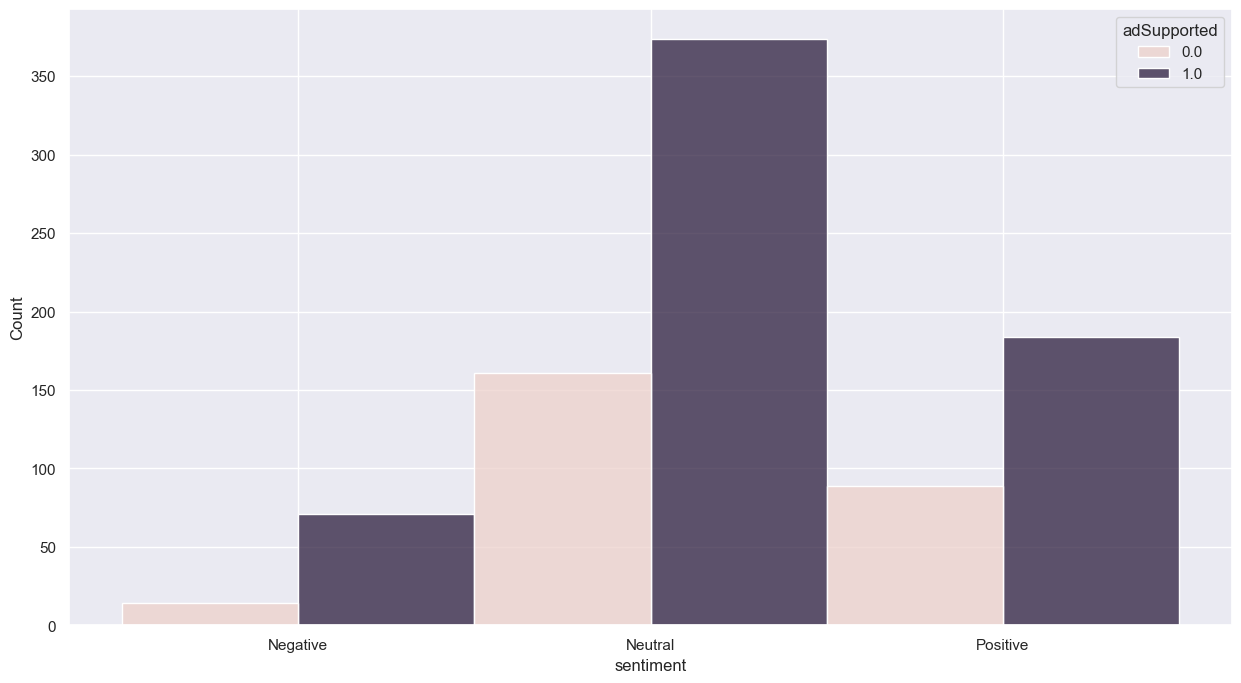

In [285]:
sns.set(rc={'figure.figsize':(15,8)})
sns.histplot(binwidth=4,
            x=df_combined['sentiment'],
            hue=df['adSupported'],
            data=df_combined,
            stat="count",
            multiple="dodge" )

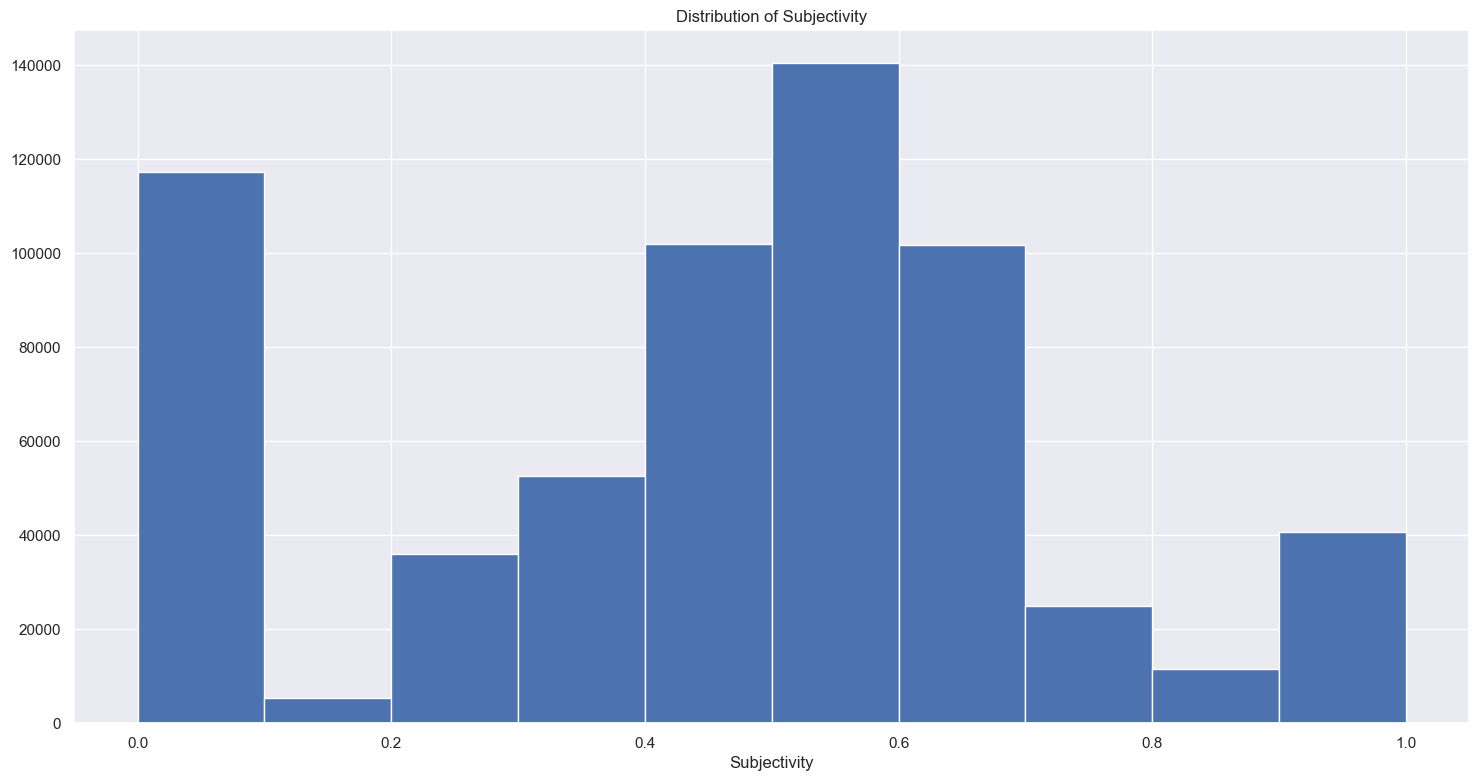

In [286]:
plt.figure(figsize=(18,9))
plt.xlabel("Subjectivity")
plt.title("Distribution of Subjectivity")
plt.hist(df_combined[df_combined['subjectivity'].notnull()]['subjectivity'])
plt.show()

# Subjectivity score distribution shows that the major reviews either have 0 value or 0.5 indicating people usually prefer giving general opinion rather than personal opinion according to their experience.


In [287]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 632575 entries, 0 to 632574
Data columns (total 42 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   title                         455845 non-null  object        
 1   description                   455845 non-null  object        
 2   descriptionHTML               455845 non-null  object        
 3   summary                       455845 non-null  object        
 4   minInstalls                   455845 non-null  float64       
 5   realInstalls                  455845 non-null  float64       
 6   score_x                       455845 non-null  float64       
 7   ratings                       455845 non-null  float64       
 8   reviews                       455845 non-null  float64       
 9   price                         455845 non-null  float64       
 10  free                          455845 non-null  float64       
 11  offersIAP    

In [341]:
df_regress=df_combined.drop(['title','description','sentiment','sortOrder','repliedAt','replyContent','at','reviewCreatedVersion','thumbsUpCount','score_y','content','userImage','userName','reviewId','Downloads_per_day','Rating_group','url','appId','recentChangesHTML','recentChanges','version','released','contentRatingDescription','contentRating','developer','inAppProductPrice','score_x','minInstalls','summary','descriptionHTML'],axis=1)

In [342]:
df_regress.dropna(inplace=True)
df_regress

realInstalls   ratings  reviews  price  free  offersIAP   genre  \
0        159741433.0  719073.0  20053.0   0.00   1.0        1.0  Puzzle   
1        159741433.0  719073.0  20053.0   0.00   1.0        1.0  Puzzle   
2        159741433.0  719073.0  20053.0   0.00   1.0        1.0  Puzzle   
3        159741433.0  719073.0  20053.0   0.00   1.0        1.0  Puzzle   
4        159741433.0  719073.0  20053.0   0.00   1.0        1.0  Puzzle   
...              ...       ...      ...    ...   ...        ...     ...   
632570      226816.0    5682.0    193.0   3.99   0.0        0.0  Casual   
632571      226816.0    5682.0    193.0   3.99   0.0        0.0  Casual   
632572      226816.0    5682.0    193.0   3.99   0.0        0.0  Casual   
632573      226816.0    5682.0    193.0   3.99   0.0        0.0  Casual   
632574      226816.0    5682.0    193.0   3.99   0.0        0.0  Casual   

        adSupported  score_round  number of days since release  Polarity  \
0               1.0          4.6                        2217.0    -0.500   
1               1.0          4.6                        2217.0     0.000   
2               1.0          4.6                        2217.0    -0.700   
3               1.0          4.6                        2217.0     0.000   
4               1.0          4.6                        2217.0    -0.700   
...             ...          ...                           ...       ...   
632570          0.0          4.2                        3035.0     0.275   
632571          0.0          4.2                        3035.0     0.000   
632572          0.0          4.2                        3035.0     0.050   
632573          0.0          4.2                        3035.0     0.500   
632574          0.0          4.2                        3035.0     0.300   

        subjectivity  
0               0.75  
1               0.00  
2               0.70  
3               0.00  
4               0.70  
...              ...  
632570          0.65  
632571          0.00  
632572          0.70  
632573          1.00  
632574          0.35  

[455845 rows x 12 columns]

In [296]:
!pip install sklearn

  Using cached sklearn-0.0.post1.tar.gz (3.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2936 sha256=60ea4b3223867b29cb2ae3df309fe3bf8aad081069ae95e2938903484fae2a8b
  Stored in directory: c:\users\hp\appdata\local\pip\cache\wheels\f8\e0\3d\9d0c2020c44a519b9f02ab4fa6d2a4a996c98d79ab2f569fa1
Successfully built sklearn


In [343]:
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
y=df_regress['realInstalls']
df_regress.drop(['realInstalls','ratings','reviews','genre'],axis=1,inplace=True)

In [344]:
df_regress.reset_index()

index  price  free  offersIAP  adSupported  score_round  \
0            0   0.00   1.0        1.0          1.0          4.6   
1            1   0.00   1.0        1.0          1.0          4.6   
2            2   0.00   1.0        1.0          1.0          4.6   
3            3   0.00   1.0        1.0          1.0          4.6   
4            4   0.00   1.0        1.0          1.0          4.6   
...        ...    ...   ...        ...          ...          ...   
455840  632570   3.99   0.0        0.0          0.0          4.2   
455841  632571   3.99   0.0        0.0          0.0          4.2   
455842  632572   3.99   0.0        0.0          0.0          4.2   
455843  632573   3.99   0.0        0.0          0.0          4.2   
455844  632574   3.99   0.0        0.0          0.0          4.2   

        number of days since release  Polarity  subjectivity  
0                             2217.0    -0.500          0.75  
1                             2217.0     0.000          0.00  
2                             2217.0    -0.700          0.70  
3                             2217.0     0.000          0.00  
4                             2217.0    -0.700          0.70  
...                              ...       ...           ...  
455840                        3035.0     0.275          0.65  
455841                        3035.0     0.000          0.00  
455842                        3035.0     0.050          0.70  
455843                        3035.0     0.500          1.00  
455844                        3035.0     0.300          0.35  

[455845 rows x 9 columns]

In [345]:
df_regress_train, df_regress_test, y_train, y_test = train_test_split(df_regress, y, test_size = 0.25)
  
# Splitting the data into training and testing data
regr = LinearRegression()
  
regr.fit(df_regress_train, y_train)
print(regr.score(df_regress_test, y_test))

0.23865861140657596


In [346]:
print(regr.intercept_, regr.coef_)

-391114195.8393573 [ 3.04151927e+07  3.04069640e+08 -2.49827630e+07  3.36407335e+07
  3.70382465e+06  1.07548355e+05  1.60559919e+07 -2.86473796e+07]


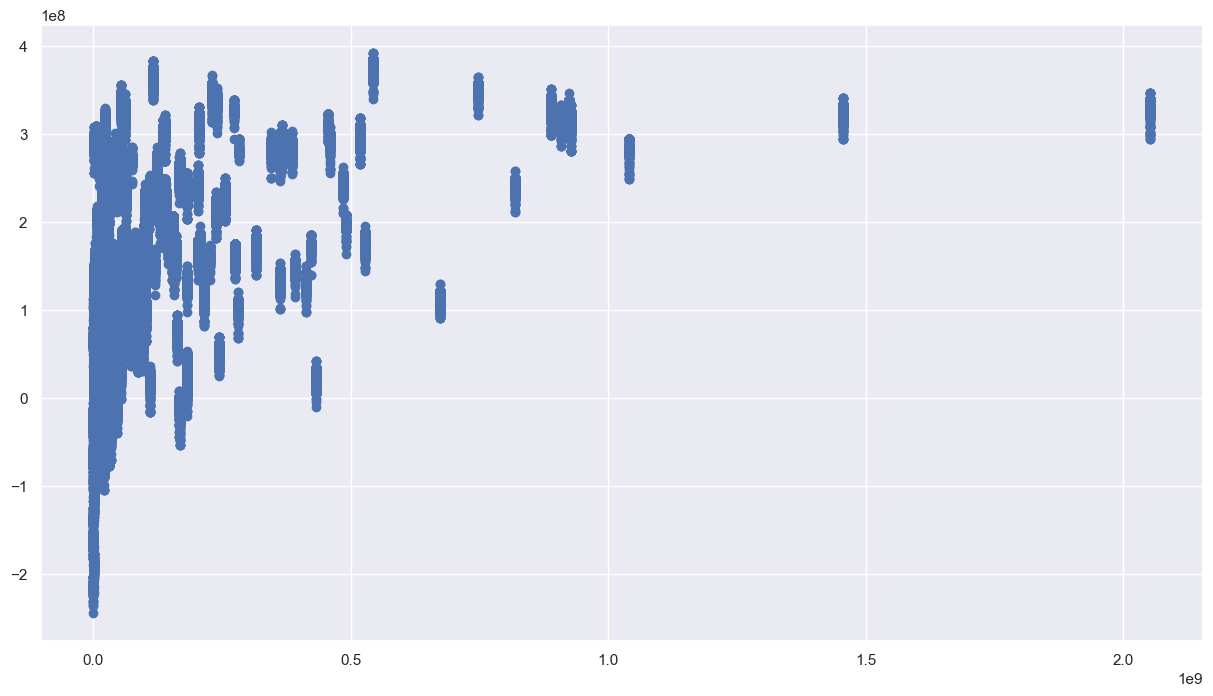

In [347]:
y_pred = regr.predict(df_regress_test)
plt.scatter(y_test,y_pred, color ='b')
# plt.plot(y_test, y_pred, color ='k')
# len(y_pred)
plt.show()

In [319]:
!pip install statsmodels

In [348]:
import statsmodels.api as sm

#define response variable
# y = df['y']

#define predictor variables
# x = df[['x1', 'x2']]

#add constant to predictor variables
x = sm.add_constant(df_regress)

#fit linear regression model
model = sm.OLS(y, df_regress).fit()

#view model summary
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:           realInstalls   R-squared (uncentered):                   0.406
Model:                            OLS   Adj. R-squared (uncentered):              0.406
Method:                 Least Squares   F-statistic:                          3.893e+04
Date:                Mon, 05 Dec 2022   Prob (F-statistic):                        0.00
Time:                        04:23:47   Log-Likelihood:                     -9.3815e+06
No. Observations:              455845   AIC:                                  1.876e+07
Df Residuals:                  455837   BIC:                                  1.876e+07
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                                   coef    std err          t      P>|t|      [0.025      0.975]
-----------------------

From the regression above, we can observe that all the P-values are negligible hence this all the terms are significant. This model, with further tuning, can be used to predict number of downloads. Fine tuning can be done by hyperparameter tuning and scraping more data. This can be an excellent model for future number of download predictions.